<a href="https://colab.research.google.com/github/ayhan-pixel/BWM_fund/blob/1st-branch/newcheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Environment


In [1]:
from google.colab import auth, drive
auth.authenticate_user()
drive.mount('/content/drive')
!pip install xarray[complete] -qq
import pandas as pd

import gcsfs
import xarray as xr
import zarr
import os


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import zarr
import gcsfs
import yfinance as yf
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

##Data

factset_fund_id

In [3]:
path="gs://rm_api_data/ERM3_Funds/factset_fund_id/04B9KC-E/fund.zarr"
ds=xr.open_zarr(path).compute()
#ds=ds.drop_vars(['monthly_return_nav'])
var_list = ['aum_erm3','aum_reported','factor_return','residual_return','total_return']
ds = xr.open_zarr(path)[var_list].compute()

df=ds.to_dataframe().dropna()
df

aum_erm3  aum_reported  factor_return  \
factset_fund_id teo                                                    
04B9KC-E        2008-06-30   340.765045    340.765045      -0.388237   
                2008-09-30   347.933044    347.933044       5.583444   
                2008-12-31   383.158844    383.158844       1.914228   
                2009-03-31   382.411469    382.411469       1.431788   
                2009-06-30   562.043396    562.043396      -0.789519   
                2009-09-30   785.364563    785.364563      -0.512527   
                2009-12-31   767.774231    767.774231      -1.093366   
                2010-03-31   837.410461    837.410461      -0.358610   
                2010-06-30   807.700378    807.700378      -0.938556   
                2010-09-30   896.532104    896.532104      -0.205432   
                2010-12-31   920.443909    920.443909      -0.115093   
                2011-03-31   957.441650    957.441650      -0.070285   
                2011-06-30   978.895386    978.895386       1.136600   
                2011-09-30   845.495117    845.495117      -2.806370   
                2012-12-31  1000.243591   1000.243591       1.632621   
                2013-09-30   995.621033    995.621033      -0.497778   
                2014-03-31  1143.632324   1143.632324       1.060905   
                2014-06-30  1196.671509   1196.671509       0.079432   
                2014-09-30  1179.749146   1179.749146      -0.453658   
                2014-12-31  1196.699829   1196.699829      -0.876766   
                2015-03-31  1203.541504   1203.541504      -0.703881   
                2015-06-30  1157.749756   1157.749756       0.309061   
                2015-09-30  1106.445801   1106.445801       1.654896   
                2015-12-31  1042.725830   1042.725830      -0.766957   
                2016-03-31  1017.187317   1017.187317      -0.182426   
                2016-06-30   854.675537    854.675537       1.533606   
                2016-09-30   835.317993    835.317993       0.910815   
                2017-03-31   829.990173    829.990173      -0.156175   
                2017-06-30   843.343506    843.343506       0.356083   
                2018-12-31   689.452881    689.452881       0.792007   
                2019-09-30   807.701782    807.701782       0.391889   
                2019-12-31   843.382935    843.382935       0.227845   
                2020-03-31   653.388062    653.388062      -1.320541   
                2020-06-30   692.539185    692.539185       1.267566   
                2020-09-30   661.619141    661.619141       0.345949   
                2020-12-31   785.054138    785.054138       0.488623   
                2021-03-31   870.852295    870.852295       0.117418   
                2021-06-30   934.834045    934.834045       0.315354   
                2022-03-31   986.823792    986.823792      -1.461350   
                2022-06-30   903.529846    903.529846      -0.567589   
                2023-06-30  1288.869385   1288.869385       0.843013   
                2024-09-30  2063.702881   2063.702881       0.269726   
                2024-12-31  2065.268555   2065.268555      -0.164226   
                2025-03-31  2033.001465   2033.001465       0.495534   
                2025-06-30  2146.044922   2146.044922       0.465196   

                            residual_return  total_return  
factset_fund_id teo                                        
04B9KC-E        2008-06-30        -0.208204     -0.596441  
                2008-09-30        -2.856230      2.727213  
                2008-12-31         1.109971      3.024199  
                2009-03-31         0.170039      1.601827  
                2009-06-30         0.262549     -0.526970  
                2009-09-30        -0.289492     -0.802019  
                2009-12-31        -0.173766     -1.267132  
                2010-03-31        -0.132061     -0.490671  
                2010-06-30        -0.270859   

In [ ]:
ds


<xarray.Dataset> Size: 1kB
Dimensions:          (factset_fund_id: 1, teo: 46)
Coordinates:
  * factset_fund_id  (factset_fund_id) object 8B '04B9KC-E'
  * teo              (teo) datetime64[ns] 368B 2008-03-31 ... 2025-06-30
Data variables:
    aum_erm3         (factset_fund_id, teo) float32 184B 359.7 ... 2.146e+03
    aum_reported     (factset_fund_id, teo) float32 184B 359.7 ... 2.146e+03
    factor_return    (factset_fund_id, teo) float32 184B nan -0.3882 ... 0.4652
    residual_return  (factset_fund_id, teo) float32 184B nan -0.2082 ... -0.6858
    total_return     (factset_fund_id, teo) float32 184B nan -0.5964 ... -0.2206

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45 entries, ('04B9KC-E', Timestamp('2008-06-30 00:00:00')) to ('04B9KC-E', Timestamp('2025-06-30 00:00:00'))
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aum_erm3         45 non-null     float32
 1   aum_reported     45 non-null     float32
 2   factor_return    45 non-null     float32
 3   residual_return  45 non-null     float32
 4   total_return     45 non-null     float32
dtypes: float32(5)
memory usage: 2.6+ KB


In [ ]:
# 1) Drop the first index level (factset_fund_id), keep 'teo' as the DatetimeIndex
df = df.reset_index(level='factset_fund_id', drop=True)   # or: df.index = df.index.droplevel('factset_fund_id')
df = df.sort_index()  # ensure chronological order
# 2) Select the last three columns for plotting
cols = ['factor_return', 'residual_return', 'total_return']
df_plot = df[cols].copy()

# (Optional) If 'teo' isn't datetime yet, parse it
if not isinstance(df_plot.index, pd.DatetimeIndex):
    df_plot.index = pd.to_datetime(df_plot.index)


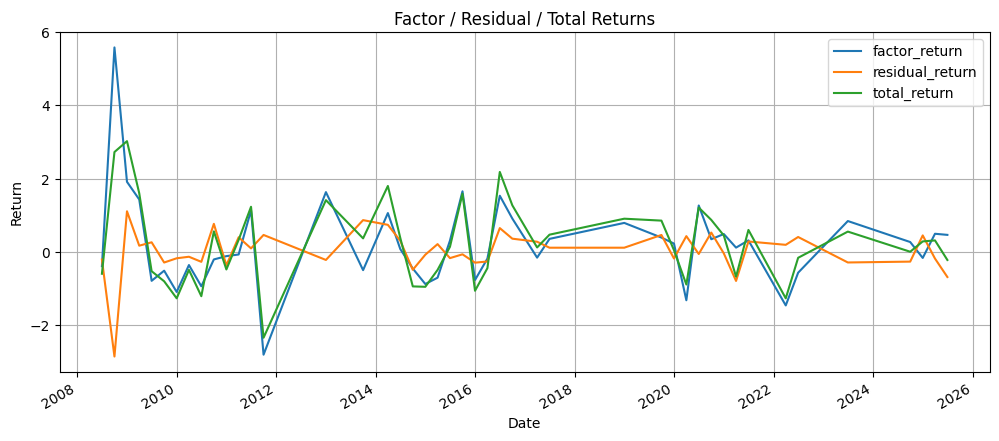

In [ ]:
import matplotlib.pyplot as plt

# 2a) Plot all three on one chart
ax = df_plot.plot(figsize=(12,5))
ax.set_title('Factor / Residual / Total Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.grid(True)
plt.show()


## Portfolio of Unique Funds

Portfolio Data

In [4]:
import pandas as pd
profile_data_path = 'gs://rm_api_data/ERM3_Funds/mf_unique_funds.csv'
profile_data = pd.read_csv(profile_data_path)
profile_data.head()

,factset_fund_id,fund_ticker,first_date,last_date,total_observations,active,style,fund_family,fund_proper_name,share_class_tickers,...,max_positions,min_positions,avg_aum,max_aum,min_aum,quarter_end_count,month_end_count,latest_aum,latest_positions,2b_filter
0,00DW8X-E,VNGAX,2024-09-30,2025-03-31,3,True,Aggressive_Growth,Unknown,Vontobel Global Equity Fund,VNGAX|VNGIX|VNGYX,...,46,42,1.860372e+07,2.002351e+07,1.586490e+07,3,3,2.002351e+07,46.0,success
1,04B8BC-E,AABPX,2008-01-31,2025-06-30,177,True,Yield,American Beacon Funds,American Beacon Balanced Fund,AABPX|AADBX|ABCCX|ABCTX|ABFAX|ABGHX|ABLSX|ACBYX,...,547,112,4.161684e+08,1.059701e+09,9.797474e+07,58,176,1.016549e+08,376.0,success
2,04B8BD-E,AADEX,2008-01-31,2025-06-30,180,True,Yield,American Beacon Funds,American Beacon Large Cap Value Fund,AADEX|AAGPX|AALRX|ABLYX|ALVAX|ALVCX|ALVTX|AVASX,...,218,137,6.456851e+09,1.159199e+10,2.778808e+09,59,179,3.171412e+09,166.0,success
3,04B8BK-E,TETAX,2008-03-31,2025-03-31,68,True,Value,Tamarack Funds,RBC Enterprise Fund,TETAX|TETIX,...,89,62,1.010521e+08,2.341894e+08,4.522982e+07,55,55,5.592843e+07,72.0,success
4,04B8BQ-E,CIRRX,2008-03-31,2025-03-31,69,True,Yield,Cohen & Steers Funds,Cohen & Steers Real Estate Securities Fund,CIRRX|CREFX|CSBIX.XX1|CSCIX|CSDIX|CSEIX|CSZIX|...,...,77,32,3.483561e+09,8.797167e+09,2.100991e+08,69,69,7.877797e+09,39.0,success


In [33]:
fund_id = "VNGAX"
profile_data_filtered = profile_data.loc[profile_data["fund_ticker"] == fund_id]
display(profile_data_filtered)

,factset_fund_id,fund_ticker,first_date,last_date,total_observations,active,style,fund_family,fund_proper_name,share_class_tickers,...,min_positions,avg_aum,max_aum,min_aum,quarter_end_count,month_end_count,latest_aum,latest_positions,2b_filter,latest_aum_yf
0,00DW8X-E,VNGAX,2024-09-30,2025-03-31,3,True,Aggressive_Growth,Unknown,Vontobel Global Equity Fund,VNGAX|VNGIX|VNGYX,...,42,18603720.0,20023511.0,15864903.0,3,3,20023511.0,46.0,success,22017328.0


In [ ]:
profile_data.columns

Index(['factset_fund_id', 'fund_ticker', 'first_date', 'last_date',
       'total_observations', 'active', 'style', 'fund_family',
       'fund_proper_name', 'share_class_tickers', 'num_share_classes',
       'avg_positions', 'max_positions', 'min_positions', 'avg_aum', 'max_aum',
       'min_aum', 'quarter_end_count', 'month_end_count', 'latest_aum',
       'latest_positions', '2b_filter'],
      dtype='object')

In [ ]:
fund_id = "04B9KC-E"
result = profile_data.loc[profile_data["factset_fund_id"] == fund_id, ["fund_ticker", "style"]]

row = result.iloc[0]   # row is a Series with both values
print("fund_ticker:", row["fund_ticker"])
print("style:", row["style"])

fund_ticker: FMIMX
style: Deep_Value


In [ ]:
result2 = profile_data.loc[profile_data["factset_fund_id"] == fund_id]
result2

,factset_fund_id,fund_ticker,first_date,last_date,total_observations,active,style,fund_family,fund_proper_name,share_class_tickers,...,max_positions,min_positions,avg_aum,max_aum,min_aum,quarter_end_count,month_end_count,latest_aum,latest_positions,2b_filter
125,04B9KC-E,FMIMX,2008-03-31,2025-06-30,63,True,Deep_Value,FMI Funds,FMI Common Stock Fund,FMIMX|FMIUX,...,49,30,9.855147e+08,2.146045e+09,351417641.0,63,63,2.146045e+09,30.0,success


In [ ]:
# Take the first row (assume unique fund_id)
row = result2.iloc[0]

# Print as "column: value"
for col, val in row.items():
    print(f"{col}: {val}")

factset_fund_id: 04B9KC-E
fund_ticker: FMIMX
first_date: 2008-03-31
last_date: 2025-06-30
total_observations: 63
active: True
style: Deep_Value
fund_family: FMI Funds
fund_proper_name: FMI Common Stock Fund
share_class_tickers: FMIMX|FMIUX
num_share_classes: 2
avg_positions: 38.42857142857143
max_positions: 49
min_positions: 30
avg_aum: 985514709.1904762
max_aum: 2146044885.0
min_aum: 351417641.0
quarter_end_count: 63
month_end_count: 63
latest_aum: 2146044885.0
latest_positions: 30.0
2b_filter: success


Yahoo Finance NAV

In [ ]:
import yfinance as yf
import pandas as pd

ticker = "FMIMX"
fund = yf.Ticker(ticker)

# get historical NAV (close price) from 2008-06-30 to 2025-06-30
fund_df = fund.history(start="2008-03-31", end="2025-06-30")
fund_df = fund_df[['Close']]  # NAV/price

# compute daily return
#fund_df['Return'] = fund_df['Close'].pct_change()


In [ ]:
# quarterly NAV (take the last trading day of each quarter)
quarterly_nav = fund_df.resample('Q').last()

# quarterly return = (NAV at end of quarter / NAV at end of previous quarter - 1)
quarterly_nav['Return'] = quarterly_nav['Close'].pct_change()

print(quarterly_nav.head(10))


                              Close    Return
Date                                         
2008-03-31 00:00:00-04:00  6.458944       NaN
2008-06-30 00:00:00-04:00  6.309751 -0.023099
2008-09-30 00:00:00-04:00  6.589491  0.044335
2008-12-31 00:00:00-05:00  5.291301 -0.197009
2009-03-31 00:00:00-04:00  4.802720 -0.092337
2009-06-30 00:00:00-04:00  5.836384  0.215225
2009-09-30 00:00:00-04:00  7.002996  0.199886
2009-12-31 00:00:00-05:00  7.084682  0.011665
2010-03-31 00:00:00-04:00  7.707551  0.087918
2010-06-30 00:00:00-04:00  7.071361 -0.082541


/tmp/ipython-input-2929610835.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_nav = fund_df.resample('Q').last()


fund return vs yahoo finance

In [ ]:
# Ensure datetime index and drop timezone (make both tz-naive)
df_factor = df[['total_return']].copy()
df_factor.index = pd.to_datetime(df_factor.index)

quarterly_return = quarterly_nav[['Return']].copy()

def drop_tz(idx):
    # if tz-aware -> remove tz; if already tz-naive, just return
    try:
        return idx.tz_localize(None)
    except TypeError:
        return idx

df_factor.index = drop_tz(df_factor.index)
quarterly_return.index = drop_tz(quarterly_return.index)

# (optional) normalize to midnight to avoid HH:MM:SS mismatches
df_factor.index = df_factor.index.normalize()
quarterly_return.index = quarterly_return.index.normalize()

# Now safe to concat
compare_df = pd.concat([quarterly_return, df_factor], axis=1)

# (optional) add a diff column for quick checking
compare_df['diff_Return_minus_factor'] = compare_df['Return'] - compare_df['total_return']

print(compare_df.head(10))


              Return  total_return  diff_Return_minus_factor
2008-03-31       NaN           NaN                       NaN
2008-06-30 -0.023099     -0.596441                  0.573342
2008-09-30  0.044335      2.727213                 -2.682878
2008-12-31 -0.197009      3.024199                 -3.221208
2009-03-31 -0.092337      1.601827                 -1.694164
2009-06-30  0.215225     -0.526970                  0.742195
2009-09-30  0.199886     -0.802019                  1.001905
2009-12-31  0.011665     -1.267132                  1.278797
2010-03-31  0.087918     -0.490671                  0.578589
2010-06-30 -0.082541     -1.209414                  1.126873


Asset Under Management Download from YChart (FMIMX)

In [ ]:
df_aum=pd.read_csv("/content/AUM_FMIMX.csv")
df_aum["Date"] = pd.to_datetime(df_aum["Date"], errors="coerce")
df_aum=df_aum.dropna().reset_index(drop=True)
df_aum

/tmp/ipython-input-4031420556.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_aum["Date"] = pd.to_datetime(df_aum["Date"], errors="coerce")


,Date,AUM
0,2025-08-15,2.271B
1,2025-08-14,2.300B
2,2025-08-13,2.333B
3,2025-08-12,2.276B
4,2025-08-11,2.221B
...,...,...
4429,2008-01-08,1.294B
4430,2008-01-07,1.308B
4431,2008-01-04,1.306B
4432,2008-01-03,1.318B


In [ ]:
dates=ds.teo.values
dates=pd.to_datetime(dates)
lookup_df = pd.DataFrame({"Date": dates})
merged=lookup_df.merge(df_aum, on="Date", how="left")
merged

,Date,AUM
0,2008-03-31,1.300B
1,2008-06-30,1.277B
2,2008-09-30,1.328B
3,2008-12-31,1.345B
4,2009-03-31,1.348B
5,2009-06-30,1.523B
6,2009-09-30,1.787B
7,2009-12-31,1.735B
8,2010-03-31,1.857B
9,2010-06-30,1.785B


In [ ]:
def parse_aum(x):
    if pd.isna(x):
        return None
    x = x.replace("$", "").replace(",", "").strip()
    if "B" in x:
        return float(x.replace("B", "")) * 1e9
    elif "M" in x:
        return float(x.replace("M", "")) * 1e6
    else:
        return float(x)

merged["AUM_numeric"] = merged["AUM"].apply(parse_aum)
merged

,Date,AUM,AUM_numeric
0,2008-03-31,1.300B,1.300000e+09
1,2008-06-30,1.277B,1.277000e+09
2,2008-09-30,1.328B,1.328000e+09
3,2008-12-31,1.345B,1.345000e+09
4,2009-03-31,1.348B,1.348000e+09
5,2009-06-30,1.523B,1.523000e+09
6,2009-09-30,1.787B,1.787000e+09
7,2009-12-31,1.735B,1.735000e+09
8,2010-03-31,1.857B,1.857000e+09
9,2010-06-30,1.785B,1.785000e+09


In [ ]:
latest_aum = merged.iloc[-1]["AUM_numeric"]
min_aum = merged["AUM_numeric"].min()
max_aum = merged["AUM_numeric"].max()
avg_aum = merged["AUM_numeric"].mean()

print("Latest AUM:", latest_aum)
print("Minimum AUM:", min_aum)
print("Maximum AUM:", max_aum)
print("Average AUM:", avg_aum)

Latest AUM: 2224000000.0
Minimum AUM: 692520000.0
Maximum AUM: 2390000000.0
Average AUM: 1631120434.7826087


FMIMX AUM Columns from factset

In [ ]:
df_asset=df[["aum_erm3", "aum_reported"]].copy()
df_asset

aum_erm3  aum_reported
factset_fund_id teo                                  
04B9KC-E        2008-06-30   340.765045    340.765045
                2008-09-30   347.933044    347.933044
                2008-12-31   383.158844    383.158844
                2009-03-31   382.411469    382.411469
                2009-06-30   562.043396    562.043396
                2009-09-30   785.364563    785.364563
                2009-12-31   767.774231    767.774231
                2010-03-31   837.410461    837.410461
                2010-06-30   807.700378    807.700378
                2010-09-30   896.532104    896.532104
                2010-12-31   920.443909    920.443909
                2011-03-31   957.441650    957.441650
                2011-06-30   978.895386    978.895386
                2011-09-30   845.495117    845.495117
                2012-12-31  1000.243591   1000.243591
                2013-09-30   995.621033    995.621033
                2014-03-31  1143.632324   1143.632324
                2014-06-30  1196.671509   1196.671509
                2014-09-30  1179.749146   1179.749146
                2014-12-31  1196.699829   1196.699829
                2015-03-31  1203.541504   1203.541504
                2015-06-30  1157.749756   1157.749756
                2015-09-30  1106.445801   1106.445801
                2015-12-31  1042.725830   1042.725830
                2016-03-31  1017.187317   1017.187317
                2016-06-30   854.675537    854.675537
                2016-09-30   835.317993    835.317993
                2017-03-31   829.990173    829.990173
                2017-06-30   843.343506    843.343506
                2018-12-31   689.452881    689.452881
                2019-09-30   807.701782    807.701782
                2019-12-31   843.382935    843.382935
                2020-03-31   653.388062    653.388062
                2020-06-30   692.539185    692.539185
                2020-09-30   661.619141    661.619141
                2020-12-31   785.054138    785.054138
                2021-03-31   870.852295    870.852295
                2021-06-30   934.834045    934.834045
                2022-03-31   986.823792    986.823792
                2022-06-30   903.529846    903.529846
                2023-06-30  1288.869385   1288.869385
                2024-09-30  2063.702881   2063.702881
                2024-12-31  2065.268555   2065.268555
                2025-03-31  2033.001465   2033.001465
                2025-06-30  2146.044922   2146.044922

In [ ]:
df_asset = df_asset.reset_index()
df_asset['teo'] = pd.to_datetime(df_asset['teo'])
df_asset = df_asset.set_index('teo')
df_asset = df_asset.drop(columns=['factset_fund_id'])

df_asset.head()

,aum_erm3,aum_reported
teo,,
2008-06-30,340.765045,340.765045
2008-09-30,347.933044,347.933044
2008-12-31,383.158844,383.158844
2009-03-31,382.411469,382.411469
2009-06-30,562.043396,562.043396


FMIMX comparison (factset vs ychart)

In [ ]:
df_compare = pd.merge(
    df_asset,
    merged[["Date","AUM_numeric"]],
    left_on="teo",
    right_on="Date",
    how="inner"
)
df_compare.head()

,aum_erm3,aum_reported,Date,AUM_numeric
0,340.765045,340.765045,2008-06-30,1.277000e+09
1,347.933044,347.933044,2008-09-30,1.328000e+09
2,383.158844,383.158844,2008-12-31,1.345000e+09
3,382.411469,382.411469,2009-03-31,1.348000e+09
4,562.043396,562.043396,2009-06-30,1.523000e+09


In [ ]:
df_compare["aum_erm3_abs"] = df_compare["aum_erm3"] * 1e6
df_compare["aum_reported_abs"] = df_compare["aum_reported"] * 1e6
df_compare

,aum_erm3,aum_reported,Date,AUM_numeric,aum_erm3_abs,aum_reported_abs
0,340.765045,340.765045,2008-06-30,1.277000e+09,3.407651e+08,3.407651e+08
1,347.933044,347.933044,2008-09-30,1.328000e+09,3.479331e+08,3.479331e+08
2,383.158844,383.158844,2008-12-31,1.345000e+09,3.831588e+08,3.831588e+08
3,382.411469,382.411469,2009-03-31,1.348000e+09,3.824115e+08,3.824115e+08
4,562.043396,562.043396,2009-06-30,1.523000e+09,5.620434e+08,5.620434e+08
5,785.364563,785.364563,2009-09-30,1.787000e+09,7.853645e+08,7.853645e+08
6,767.774231,767.774231,2009-12-31,1.735000e+09,7.677742e+08,7.677742e+08
7,837.410461,837.410461,2010-03-31,1.857000e+09,8.374104e+08,8.374104e+08
8,807.700378,807.700378,2010-06-30,1.785000e+09,8.077004e+08,8.077004e+08
9,896.532104,896.532104,2010-09-30,1.841000e+09,8.965321e+08,8.965321e+08


In [ ]:
df_compare["diff_vs_scraped"] = df_compare["aum_erm3_abs"] - df_compare["AUM_numeric"]
df_compare["diff_vs_scraped_pct"] = df_compare["diff_vs_scraped"] / df_compare["AUM_numeric"]

In [ ]:
df_compare=df_compare[[ "aum_erm3_abs", "aum_reported_abs", "AUM_numeric", "diff_vs_scraped", "diff_vs_scraped_pct"]]
df_compare

,aum_erm3_abs,aum_reported_abs,AUM_numeric,diff_vs_scraped,diff_vs_scraped_pct
0,3.407651e+08,3.407651e+08,1.277000e+09,-9.362349e+08,-0.733152
1,3.479331e+08,3.479331e+08,1.328000e+09,-9.800669e+08,-0.738002
2,3.831588e+08,3.831588e+08,1.345000e+09,-9.618412e+08,-0.715124
3,3.824115e+08,3.824115e+08,1.348000e+09,-9.655885e+08,-0.716312
4,5.620434e+08,5.620434e+08,1.523000e+09,-9.609566e+08,-0.630963
5,7.853645e+08,7.853645e+08,1.787000e+09,-1.001635e+09,-0.560512
6,7.677742e+08,7.677742e+08,1.735000e+09,-9.672258e+08,-0.557479
7,8.374104e+08,8.374104e+08,1.857000e+09,-1.019590e+09,-0.549052
8,8.077004e+08,8.077004e+08,1.785000e+09,-9.772996e+08,-0.547507
9,8.965321e+08,8.965321e+08,1.841000e+09,-9.444679e+08,-0.513019


## For ALL Ticker on Profile Data

Last AUM

In [ ]:
tickers = profile_data["fund_ticker"].unique()
tickers[1:5]

array(['AABPX', 'AADEX', 'TETAX', 'CIRRX'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import zarr
import gcsfs
import yfinance as yf
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

AUM from yahoo finance

In [ ]:
import yfinance as yf
import pandas as pd
import time
tickers = profile_data["fund_ticker"].unique()

aum_dict = {}

for t in tickers:
    try:
        aum_dict[t] = yf.Ticker(t).info["totalAssets"]
    except Exception as e:
        aum_dict[t] = None

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yf

In [ ]:
profile_data["AUM"] = profile_data["fund_ticker"].map(aum_dict)


profile_data.head()

,factset_fund_id,fund_ticker,first_date,last_date,total_observations,active,style,fund_family,fund_proper_name,share_class_tickers,...,min_positions,avg_aum,max_aum,min_aum,quarter_end_count,month_end_count,latest_aum,latest_positions,2b_filter,AUM
0,00DW8X-E,VNGAX,2024-09-30,2025-03-31,3,True,Aggressive_Growth,Unknown,Vontobel Global Equity Fund,VNGAX|VNGIX|VNGYX,...,42,1.860372e+07,2.002351e+07,1.586490e+07,3,3,2.002351e+07,46.0,success,2.201733e+07
1,04B8BC-E,AABPX,2008-01-31,2025-06-30,177,True,Yield,American Beacon Funds,American Beacon Balanced Fund,AABPX|AADBX|ABCCX|ABCTX|ABFAX|ABGHX|ABLSX|ACBYX,...,112,4.161684e+08,1.059701e+09,9.797474e+07,58,176,1.016549e+08,376.0,success,1.051490e+08
2,04B8BD-E,AADEX,2008-01-31,2025-06-30,180,True,Yield,American Beacon Funds,American Beacon Large Cap Value Fund,AADEX|AAGPX|AALRX|ABLYX|ALVAX|ALVCX|ALVTX|AVASX,...,137,6.456851e+09,1.159199e+10,2.778808e+09,59,179,3.171412e+09,166.0,success,3.286823e+09
3,04B8BK-E,TETAX,2008-03-31,2025-03-31,68,True,Value,Tamarack Funds,RBC Enterprise Fund,TETAX|TETIX,...,62,1.010521e+08,2.341894e+08,4.522982e+07,55,55,5.592843e+07,72.0,success,5.742906e+07
4,04B8BQ-E,CIRRX,2008-03-31,2025-03-31,69,True,Yield,Cohen & Steers Funds,Cohen & Steers Real Estate Securities Fund,CIRRX|CREFX|CSBIX.XX1|CSCIX|CSDIX|CSEIX|CSZIX|...,...,32,3.483561e+09,8.797167e+09,2.100991e+08,69,69,7.877797e+09,39.0,success,8.051332e+09


In [ ]:
profile_data.rename(columns={"AUM": "latest_aum_yf"}, inplace=True)

In [ ]:
profile_data.to_csv("profile_data.csv", index=False)

Graph of Latest AUM comparisons

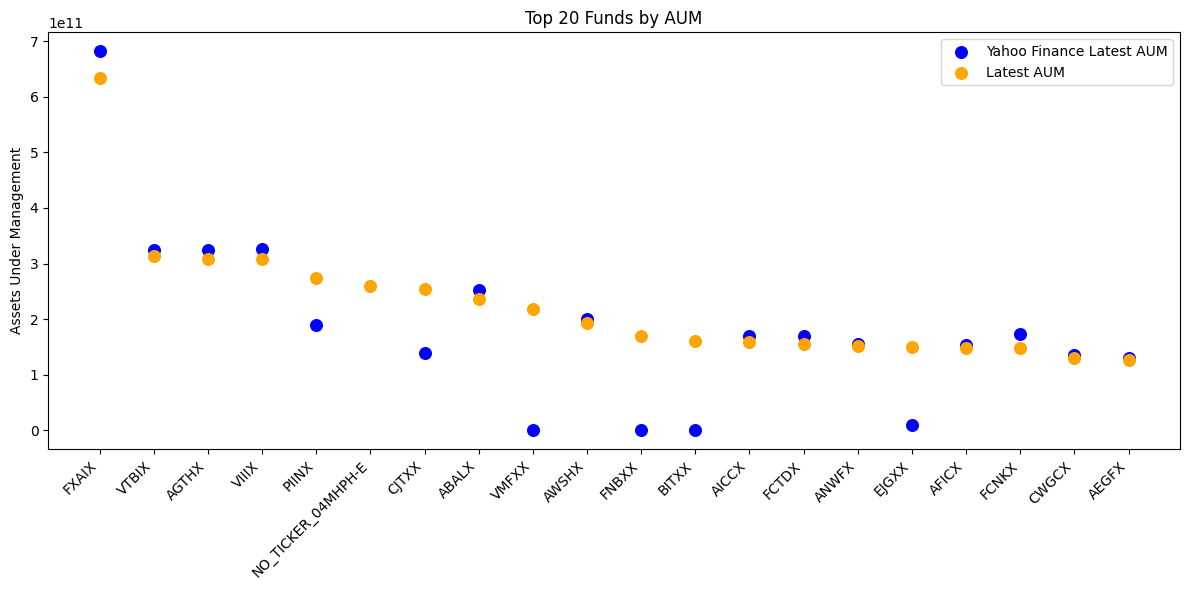

In [ ]:
top_n = 20
df_top = profile_data.sort_values('latest_aum', ascending=False).head(top_n)

x = np.arange(len(df_top))

plt.figure(figsize=(12, 6))
plt.scatter(x, df_top['latest_aum_yf'], color='blue', label='Yahoo Finance Latest AUM', s=70)
plt.scatter(x, df_top['latest_aum'], color='orange', label='Latest AUM', s=70)

plt.xticks(x, df_top['fund_ticker'], rotation=45, ha='right')
plt.ylabel('Assets Under Management')
plt.title(f'Top {top_n} Funds by AUM')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
profile_data.T

,0,1,2,3,4,5,6,7,8,9,...,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635
factset_fund_id,00DW8X-E,04B8BC-E,04B8BD-E,04B8BK-E,04B8BQ-E,04B8C0-E,04B8CT-E,04B8CY-E,04B8D3-E,04B8DG-E,...,11B8NN-E,11B973-E,11BYQL-E,11C074-E,11D6VH-E,11FRJL-E,11K87K-E,11N69G-E,11NHJL-E,11RFWT-E
fund_ticker,VNGAX,AABPX,AADEX,TETAX,CIRRX,AAERX,ACAAX,AACCX,ACEIX,CACRX,...,F00001P5P2,F00001P5P6,LCORX,GLBIX,APAMX,THIBX,GWSBX,F00001P5P0,HOTAX,F00000YBXF
first_date,2024-09-30,2008-01-31,2008-01-31,2008-03-31,2008-03-31,2008-01-31,2008-01-31,2008-02-29,2008-03-31,2008-03-31,...,2025-04-30,2025-04-30,2025-03-31,2025-03-31,2024-12-31,2025-03-31,2025-06-30,2025-04-30,2025-05-30,2021-07-31
last_date,2025-03-31,2025-06-30,2025-06-30,2025-03-31,2025-03-31,2025-06-30,2025-05-31,2025-04-30,2025-05-31,2025-05-31,...,2025-06-30,2025-06-30,2025-06-30,2025-06-30,2025-03-31,2025-03-31,2025-06-30,2025-06-30,2025-06-30,2025-04-30
total_observations,3,177,180,68,69,182,117,79,111,178,...,3,3,2,2,2,1,1,3,2,43
active,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
style,Aggressive_Growth,Yield,Yield,Value,Yield,Value,Aggressive_Growth,Value,Value,Aggressive_Growth,...,Aggressive_Growth,Unknown,Value,Yield,Unknown,Unknown,Unknown,Index,Unknown,Yield
fund_family,Unknown,American Beacon Funds,American Beacon Funds,Tamarack Funds,Cohen & Steers Funds,American Beacon Funds,Alger Funds,American Century Funds,Van Kampen Funds,Columbia Funds,...,Unknown,Unknown,Leuthold Funds,Leuthold Funds,Unknown,Unknown,Unknown,NVIT Funds,Holbrook Funds,Unknown
fund_proper_name,Vontobel Global Equity Fund,American Beacon Balanced Fund,American Beacon Large Cap Value Fund,RBC Enterprise Fund,Cohen & Steers Real Estate Securities Fund,American Beacon International Equity Fund,Alger Funds - Capital Appreciation Fund,American Century Strategic Allocation Conserva...,Invesco Equity & Income Fund,Columbia Acorn International Fund,...,Nvit Fidelity Institutional Am Worldwide Fund,Nvit Jp Morgan Inflation Managed Fund,Leuthold Core Investment Funds,Leuthold Global Funds,Imgp Apa Enhanced Income Municipal Fund,Thornburg High Income Bond Managed Account Fund,Amg Gw&K Securitized Bond Sma Shares,Nationwide Variable Insurance Trust - Nasdaq-1...,Holbrook Total Return Fund,The London Co Income Equity Collective Trust
share_class_tickers,VNGAX|VNGIX|VNGYX,AABPX|AADBX|ABCCX|ABCTX|ABFAX|ABGHX|ABLSX|ACBYX,AADEX|AAGPX|AALRX|ABLYX|ALVAX|ALVCX|ALVTX|AVASX,TETAX|TETIX,CIRRX|CREFX|CSBIX.XX1|CSCIX|CSDIX|CSEIX|CSZIX|...,AAERX|AAIEX|AAIPX|AAISX|ABEYX|AIEAX|AILCX|AILTX,ACAAX|ACAZX|ALCCX,AACCX|AACDX|AACGX|AACRX|ACCAX|ACCIX|TWSCX,ACEIX|ACEKX|ACEQX|ACERX|ACESX|ACETX|IEIFX,CACRX|CAIRX|CCIDX|CCYIX|LAIAX|LAICX|LIABX,...,F00001P5P2|F00001P5P4,F00001P5P6|F00001P5P8,LCORX|LCRIX,GLBIX|GLBLX,APAMX,THIBX,GWSBX,F00001P5P0|F00001P5P1,HOTAX|HOTIX,F00000YBXF




Latest AUM DF and DS from YF

In [ ]:
import datetime as dt
from datetime import datetime

latest_aum_yf_df = pd.DataFrame(profile_data[["fund_ticker", "latest_aum_yf"]])
latest_aum_yf_df['teo']=pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
latest_aum_yf_df = latest_aum_yf_df[['teo', 'fund_ticker', 'latest_aum_yf']]
latest_aum_yf_df.head()

,teo,fund_ticker,latest_aum_yf
0,2025-08-25,VNGAX,2.201733e+07
1,2025-08-25,AABPX,1.051490e+08
2,2025-08-25,AADEX,3.286823e+09
3,2025-08-25,TETAX,5.742906e+07
4,2025-08-25,CIRRX,8.051332e+09


In [ ]:
latest_aum_yf_df.to_csv("latest_aum_yf.csv", index=False)

In [ ]:
latest_aum_yf_df.set_index(["teo", "fund_ticker"]).to_xarray()

<xarray.Dataset> Size: 90kB
Dimensions:        (teo: 1, fund_ticker: 5636)
Coordinates:
  * teo            (teo) datetime64[ns] 8B 2025-08-25
  * fund_ticker    (fund_ticker) object 45kB 'AAAAX' 'AAAEX' ... 'ZVGIX' 'ZVNBX'
Data variables:
    latest_aum_yf  (teo, fund_ticker) float64 45kB 4.126e+09 ... 1.453e+08

In [ ]:
latest_aum_yf_df.set_index(["teo", "fund_ticker"]).to_xarray().to_zarr("latest_aum_yf.zarr")

/usr/local/lib/python3.12/dist-packages/zarr/api/asynchronous.py:233: ZarrUserWarning: Consolidated metadata is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  warnings.warn(


## Fund Flow for all funds

Fund Flow

In [ ]:
aum = ds["aum_reported"]
ret = ds["total_return"]


projected_aum = aum.shift(teo=1)


flow = aum - (projected_aum * (1 + ret / 100.0))

ds["fund_flow"] = flow


print(ds["fund_flow"].isel(factset_fund_id=0).to_pandas().head(10))


teo
2008-03-31           NaN
2008-06-30    -16.827423
2008-09-30     -2.125366
2008-12-31     24.703613
2009-03-31     -6.884918
2009-06-30    181.647125
2009-09-30    227.828857
2009-12-31     -7.638733
2010-03-31     73.403503
2010-06-30    -19.582336
Name: fund_flow, dtype: float32


Fund Flow for ALL Funds

In [ ]:
fund_ids = profile_data["factset_fund_id"].unique()
fund_ids

array(['00DW8X-E', '04B8BC-E', '04B8BD-E', ..., '11N69G-E', '11NHJL-E',
       '11RFWT-E'], dtype=object)

In [ ]:
all_flows = []

for fid in fund_ids:
    try:
        path = f"gs://rm_api_data/ERM3_Funds/factset_fund_id/{fid}/fund.zarr"
        ds = xr.open_zarr(path).compute()

        aum = ds["aum_reported"]
        ret = ds["total_return"]

        prev_aum = aum.shift(teo=1)
        flow = aum - (prev_aum * (1 + ret / 100.0))

        df = flow.to_pandas().reset_index()
        df["factset_fund_id"] = fid

        all_flows.append(df)
    except Exception as e:
        print(f"{fid} -> Error: {e}")

flows_df = pd.concat(all_flows, ignore_index=True)

print(flows_df.head())

Streaming output truncated to the last 5000 lines.
04BDM3-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDM3-E/fund.zarr' at path ''
04BDNB-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDNB-E/fund.zarr' at path ''
04BDNQ-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDNQ-E/fund.zarr' at path ''
04BDP2-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDP2-E/fund.zarr' at path ''
04BDP3-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDP3-E/fund.zarr' at path ''
04BDRT-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDRT-E/fund.zarr' at path ''
04BDS2-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDS2-E/fund.zarr' at path ''
04BDSC-E -> Error: No group found in store 'gs://rm_api_data/ERM3_Funds/factset_fund_id/04BDSC-E/fund.zarr' at path 

In [ ]:
flows_df

teo,factset_fund_id,2008-03-31 00:00:00,2008-06-30 00:00:00,2008-09-30 00:00:00,2008-12-31 00:00:00,2009-03-31 00:00:00,2009-06-30 00:00:00,2009-09-30 00:00:00,2009-12-31 00:00:00,2010-03-31 00:00:00,...,2011-02-28 00:00:00,2011-05-31 00:00:00,2011-08-31 00:00:00,2011-11-30 00:00:00,2012-02-29 00:00:00,2013-05-31 00:00:00,2009-08-31 00:00:00,2009-11-30 00:00:00,2010-08-31 00:00:00,2025-07-31 00:00:00
0,04B8NR-E,NaN,-1.492973,-3.032402,-13.616934,-5.919918,6.657001,5.749315,3.287498,4.560272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04B8SY-E,10.334351,-136.564087,-101.995911,-113.878296,-183.553284,72.561584,186.254517,237.126709,419.353638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04B8X2-E,NaN,-303.558594,-363.583740,-433.759399,-223.338135,77.325623,162.372925,16.307983,49.994263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04B92L-E,NaN,-0.374943,-0.539186,-3.030727,-1.877178,2.198033,1.870694,0.807594,0.621376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04B946-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0Y33ZL-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,0ZDJBQ-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,104BCB-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,10RJ2R-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## MorningStar Setup

MorningStar Info


In [50]:
pip install mstarpy

In [51]:
import mstarpy as ms
funds = ms.Funds("FMIMX")
funds.name


'FMI Common Stock Investor'

In [ ]:
funds.holdings()

,securityName,secId,performanceId,holdingTypeId,weighting,numberOfShare,marketValue,shareChange,country,ticker,...,susEsgRiskCategory,managementExpenseRatio,qualRating,quantRating,bestRatingType,securityType,domicileCountryId,currencyName,originalMarketValue,isMomentumFilterFlag
0,Microsoft Corp,0P000003MH,0P000003MH,E,6.04071,2274.0,978502.0,2274.0,United States,MSFT,...,Low,None,None,3,Qual,ST,USA,US Dollar,978502.0,False
1,Amazon.com Inc,0P000000B7,0P000000B7,E,5.40984,4703.0,876310.0,4703.0,United States,AMZN,...,Medium,None,None,3,Qual,ST,USA,US Dollar,876310.0,False
2,Coca-Cola Co,0P000001BW,0P000001BW,E,5.00007,11271.0,809934.0,11271.0,United States,KO,...,Medium,None,None,3,Qual,ST,USA,US Dollar,809934.0,False
3,Alphabet Inc Class C,0P00012BBI,0P00012BBI,E,4.01707,3892.0,650703.0,3892.0,United States,GOOG,...,Medium,None,None,5,Qual,ST,USA,US Dollar,650703.0,False
4,RELX PLC,0P00007OT5,0P00007OT5,E,3.94973,13593.0,639795.0,13593.0,United Kingdom,REL,...,Negligible,None,None,3,Qual,ST,GBR,British Pound Sterling,639795.0,False
5,Taiwan Semiconductor Manufacturing Co Ltd ADR,0P000005AR,0P000005AR,E,3.79859,3543.0,615313.0,3543.0,Taiwan,TSM,...,Low,None,None,4,Qual,ST,TWN,US Dollar,615313.0,False
6,London Stock Exchange Group PLC,0P000090TO,0P000090TO,E,3.64497,4307.0,590429.0,4307.0,United Kingdom,LSEG,...,Low,None,None,3,Qual,ST,GBR,British Pound Sterling,590429.0,False
7,Mastercard Inc Class A,0P00005U6B,0P00005U6B,E,3.45388,1133.0,559475.0,1133.0,United States,MA,...,Low,None,None,2,Qual,ST,USA,US Dollar,559475.0,False
8,Constellation Software Inc,0P00006SX1,0P00006SX1,E,3.23717,161.0,524372.0,161.0,Canada,CSU,...,Medium,None,None,3,Qual,ST,CAN,Canadian Dollar,524372.0,False
9,CME Group Inc Class A,0P00000187,0P00000187,E,3.17658,2332.0,514556.0,2332.0,United States,CME,...,Low,None,None,2,Qual,ST,USA,US Dollar,514556.0,False


Fund Family

In [35]:
fund_family=pd.DataFrame([funds.parentSummary()])
fund_family

,secId,fundId,companyId,marketName,firmName,currency,netAsset,netFlowTTM,netAssetTTM,assetGrowthRate,numFund,managerRetention5Year,template,domicileCountryId
0,FOUSA00CKD,FSUSA000VK,0C00001YVL,US Open-end ex MM ex FoF ex Feeder,FMI Funds,USD,6.991630e+09,-2.101513e+09,8.881991e+09,-0.236604,5,94.02,USA_OE,USA


In [ ]:
fund_family_name=fund_family["firmName"]
fund_family_name[0]

'Vontobel Asset Management Inc'

Asset Allocation

In [ ]:
allocation=funds.allocationMap()
pd.json_normalize(allocation, record_path=None)


,assetType,portfolioDate,portfolioDateCategory,portfolioDateIndex,portfolioDateGlobal,portfolioDateCategoryGlobal,portfolioDateIndexGlobal,fundName,categoryName,indexName,...,globalAllocationMap.assetAllocConvertible.longAllocation,globalAllocationMap.assetAllocConvertible.longAllocationIndex,globalAllocationMap.assetAllocConvertible.longAllocationCategory,globalAllocationMap.assetAllocConvertible.targetAllocation,globalAllocationMap.assetAllocFixedIncome.netAllocation,globalAllocationMap.assetAllocFixedIncome.shortAllocation,globalAllocationMap.assetAllocFixedIncome.longAllocation,globalAllocationMap.assetAllocFixedIncome.longAllocationIndex,globalAllocationMap.assetAllocFixedIncome.longAllocationCategory,globalAllocationMap.assetAllocFixedIncome.targetAllocation
0,EQUITY,2024-09-30T05:00:00.000,2025-07-31T05:00:00.000,None,2024-09-30T05:00:00.000,2025-07-31T05:00:00.000,None,Vontobel Global Equity A,Global Large-Stock Growth,None,...,0.00000,None,0.01026,None,0.00000,0.00000,0.00000,None,0.00027,None


Weight

In [ ]:
weights=pd.DataFrame([funds.allocationWeighting()])
weights

,portfolioDate,masterPortfolioId,largeValue,largeBlend,largeGrowth,middleValue,middleBlend,middleGrowth,smallValue,smallBlend,smallGrowth
0,2024-09-30T05:00:00.000,3341638,13.38100,38.33200,44.74100,0.00000,0.00000,3.54600,0.00000,0.00000,0.00000


Rating

In [ ]:
rating=pd.DataFrame(funds.analystRating())
rating

,rating,medalistRating,medalistRatingLabel,shareClassCount,percent,noPremiumChinaFund
0,7,None,None,0,0.0,False
1,6,None,None,0,0.0,False
2,5,None,None,0,0.0,False
3,4,None,None,0,1.0,False
4,3,None,None,0,0.0,False
5,2,None,None,0,0.0,False
6,1,None,None,0,0.0,False
7,0,None,None,0,0.0,False


Distribution

In [ ]:
funds.distribution("annual")

{'distribution': [{'distributionDate': '2024-12-30T06:00:00.000',
   'distributionNav': 10.68,
   'income': 0.0205,
   'capGainShortTerm': 0.0263,
   'capGainLongTerm': 0.0,
   'returnOfCapital': 0.0,
   'total': 0.0468,
   'interestIncome': None,
   'foreignIncome': None,
   'capitalGains': None,
   'canadianDividend': None},
  {'distributionDate': '2023-12-31T00:00:00.000Z',
   'distributionNav': None,
   'income': None,
   'capGainShortTerm': None,
   'capGainLongTerm': None,
   'returnOfCapital': None,
   'total': None,
   'interestIncome': None,
   'foreignIncome': None,
   'capitalGains': None,
   'canadianDividend': None},
  {'distributionDate': '2022-12-31T00:00:00.000Z',
   'distributionNav': None,
   'income': None,
   'capGainShortTerm': None,
   'capGainLongTerm': None,
   'returnOfCapital': None,
   'total': None,
   'interestIncome': None,
   'foreignIncome': None,
   'capitalGains': None,
   'canadianDividend': None},
  {'distributionDate': '2021-12-31T00:00:00.000Z',
  

In [ ]:
distribution=funds.distribution("annual")
distribution_df = pd.DataFrame(distribution['distribution'])
print(distribution_df)

           distributionDate  distributionNav  income  capGainShortTerm  \
0   2024-12-30T06:00:00.000            10.68  0.0205            0.0263   
1  2023-12-31T00:00:00.000Z              NaN     NaN               NaN   
2  2022-12-31T00:00:00.000Z              NaN     NaN               NaN   
3  2021-12-31T00:00:00.000Z              NaN     NaN               NaN   
4  2020-12-31T00:00:00.000Z              NaN     NaN               NaN   

   capGainLongTerm  returnOfCapital   total interestIncome foreignIncome  \
0              0.0              0.0  0.0468           None          None   
1              NaN              NaN     NaN           None          None   
2              NaN              NaN     NaN           None          None   
3              NaN              NaN     NaN           None          None   
4              NaN              NaN     NaN           None          None   

  capitalGains canadianDividend  
0         None             None  
1         None             Non

Benchmark

In [ ]:
print("Prospectus Benchmark:", funds.quote().get("prospectusBenchmarkName"))
print("Primary Index:", funds.quote().get("primaryIndexNameNew"))
print("Index:", funds.quote().get("index"))

Prospectus Benchmark: N/A
Primary Index: MSCI ACWI NR USD
Index: MSCI ACWI Growth NR USD


Expense Ratio

In [ ]:
print("Expense Ratio:", funds.quote().get("expenseRatio"))


Expense Ratio: 0.98


Managers

In [ ]:
pd.DataFrame(funds.people()["currentManagerList"])

,personId,familyName,middleName,givenName,startDate,ownershipLevelId,endDate,gender,genderSourceType
0,128227,Chelat,None,Ramiz,2024-08-05T05:00:00.000,6,None,male,reported
1,187800,Hansen,None,Rob,2025-07-01T05:00:00.000,5,None,male,reported


In [ ]:
pd.DataFrame([funds.morningstarOpinion()])["processText"][0]

["Morningstar's style-agnostic investment process evaluation looks for strategies that should be able to outperform their Morningstar Category index on a risk-adjusted basis over time. Vontobel Global Equity Fund earns an Average Process Pillar rating.",
 "The most substantial contributor to the rating is the experience of the management team, which averages 22 years at this fund. The process is limited by the parent firm's five-year retention rate of 61%, which raises concerns about long-term strategic consistency..",
 "The investment strategy as stated in the fund's prospectus is as follows:",
 'The investment seeks long-term capital appreciation.  Under normal circumstances, the fund invests at least 80% of its net assets, plus any borrowings for investment purposes, in equity securities. The fund may invest in equity securities of issuers located throughout the world, and including issuers in emerging markets countries and issuers in the United States. The equity securities in whic

## MorningStar All Funds (fund info)

ALL Funds

In [ ]:
tickers = profile_data["fund_ticker"].unique()

results = []

for t in tickers:
    try:
        fund = ms.Funds(t)

        quote = fund.quote()
        expense_ratio = quote.get("expenseRatio")
        prospectus_benchmark = quote.get("prospectusBenchmarkName")
        primary_index = quote.get("primaryIndexNameNew")
        index = quote.get("index")

        fund_family = fund.parentSummary()
        fund_family_name = fund_family.get("firmName") if fund_family else None

        managers_df = pd.DataFrame(fund.people().get("currentManagerList", []))
        if not managers_df.empty:
            managers = (
                managers_df["givenName"].fillna("") + " " + managers_df["familyName"].fillna("")
            ).str.strip()
            managers_with_dates = (
                managers_df["startDate"].astype(str) + " - " + managers
            )
            managers_str = "; ".join(managers_with_dates.tolist())
        else:
            managers_str = None

        data = {
            "Ticker": t,
            "Expense Ratio": expense_ratio,
            "Prospectus Benchmark": prospectus_benchmark,
            "Primary Index": primary_index,
            "Index": index,
            "Fund Family": fund_family_name,
            "Managers": managers_str,
        }

        results.append(data)

    except Exception as e:
        print(f"Error for {t}: {e}")

df_fund_info = pd.DataFrame(results)
print(df_fund_info)


Error for CACRX: 0 security found with the term CACRX
Error for ABPRX: 0 security found with the term ABPRX
Error for BAETX: 0 security found with the term BAETX
Error for BNIBX: 0 security found with the term BNIBX
Error for ACUTX: 0 security found with the term ACUTX
Error for CHCBX: 0 security found with the term CHCBX
Error for BCHTX: 0 security found with the term BCHTX
Error for ESVSX: 0 security found with the term ESVSX
Error for EQTBX: 0 security found with the term EQTBX
Error for EQPIX: 0 security found with the term EQPIX
Error for FAEBX: 0 security found with the term FAEBX
Error for FEUFX: 0 security found with the term FEUFX
Error for FBEIX: 0 security found with the term FBEIX
Error for FIVFX: 0 security found with the term FIVFX
Error for FSEMX: 0 security found with the term FSEMX
Error for FSIIX: 0 security found with the term FSIIX
Error for EMRCX: 0 security found with the term EMRCX
Error for GUSIX: 0 security found with the term GUSIX
Error for NO_TICKER_04BB20-E

In [ ]:
df_fund_info

,Ticker,Expense Ratio,Prospectus Benchmark,Primary Index,Index,Fund Family,Managers
0,VNGAX,0.98,N/A,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,2024-08-05T05:00:00.000 - Ramiz Chelat; 2025-07-01T05:00:00.000 - Rob Hansen
1,AABPX,1.18,Bloomberg US Agg Bond TR USD,Morningstar Mod Tgt Risk TR USD,Morningstar Mod Tgt Risk TR USD,American Beacon,1989-12-31T06:00:00.000 - George Davis; 1995-12-31T06:00:00.000 - Patricia McKenna; 1998-12-31T06:00:00.000 - J. Scott McDonald; 2003-12-31T06:00:00.000 - Deborah Petruzzelli; 2004-12-31T06:00:00.000 - Scott McBride; 2011-03-01T06:00:00.000 - Erin Higginbotham; 2014-02-28T06:00:00.000 - Samuel Silver; 2015-02-27T06:00:00.000 - Mark Giambrone; 2016-02-28T06:00:00.000 - Kirk Brown; 2016-12-31T06:00:00.000 - Paul Cavazos; 2021-10-31T05:00:00.000 - Justin Martin; 2021-10-31T05:00:00.000 - Matthew Routh; 2024-07-01T05:00:00.000 - Douglas Campbell


In [ ]:
import pandas as pd
import concurrent.futures



def fetch_fund_info(ticker):
    try:
        fund = ms.Funds(ticker)
        quote = fund.quote()
        fund_family = fund.parentSummary()
        managers_df = pd.DataFrame(fund.people().get("currentManagerList", []))

        # Keep only manager names (no dates)
        if not managers_df.empty:
            managers = (managers_df["givenName"].fillna("") + " " +
                        managers_df["familyName"].fillna("")).str.strip()
            managers_str = "; ".join(managers.tolist())
        else:
            managers_str = None

        return {
            "Ticker": ticker,
            "Expense Ratio": quote.get("expenseRatio"),
            "Prospectus Benchmark": quote.get("prospectusBenchmarkName"),
            "Primary Index": quote.get("primaryIndexNameNew"),
            "Index": quote.get("index"),
            "Fund Family": fund_family.get("firmName") if fund_family else None,
            "Managers": managers_str
        }
    except Exception as e:
        print(f"Error for {ticker}: {e}")
        return None

def fetch_all_funds_info(tickers, max_workers=10):
    results = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_ticker = {executor.submit(fetch_fund_info, t): t for t in tickers}
        for future in concurrent.futures.as_completed(future_to_ticker):
            result = future.result()
            if result:
                results.append(result)
    return pd.DataFrame(results)

tickers = profile_data["fund_ticker"].unique()
df_fund_info = fetch_all_funds_info(tickers, max_workers=10)
print(df_fund_info)


Error for CACRX: 0 security found with the term CACRX
Error for ABPRX: 0 security found with the term ABPRX
Error for BAETX: 0 security found with the term BAETX
Error for BNIBX: 0 security found with the term BNIBX
Error for ACUTX: 0 security found with the term ACUTX
Error for CHCBX: 0 security found with the term CHCBX
Error for BCHTX: 0 security found with the term BCHTX
Error for ESVSX: 0 security found with the term ESVSX
Error for EQTBX: 0 security found with the term EQTBX
Error for EQPIX: 0 security found with the term EQPIX
Error for FAEBX: 0 security found with the term FAEBX
Error for FEUFX: 0 security found with the term FEUFX
Error for FBEIX: 0 security found with the term FBEIX
Error for FEIKX: Error 504
            for the api https://api-global.morningstar.com/sal-service/v1/fund/parent/parentSummary/FOUSA06TX8/data. Message : Gateway Time-out.
Error for FFDKX: Error 504
            for the api https://api-global.morningstar.com/sal-service/v1/fund/parent/parentSummary

In [ ]:
df_fund_info.to_csv("fund_info.csv", index=False)

In [ ]:
df_fund_info

,Ticker,Expense Ratio,Prospectus Benchmark,Primary Index,Index,Fund Family,Managers
0,CIRRX,1.25,S&P 500 TR USD,MSCI ACWI NR USD,Morningstar US Real Est TR USD,Cohen & Steers,Jason Yablon; Mathew Kirschner; Ji Zhang
1,VNGAX,0.98,N/A,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,Ramiz Chelat; Rob Hansen
2,ACAAX,1.26,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Growth TR USD,Alger,Patrick Kelly; Daniel Chung; Ankur Crawford
3,AADEX,0.66,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Value TR USD,American Beacon,George Davis; Patricia McKenna; Scott McBride;...
4,AAERX,0.70,MSCI EAFE NR USD,MSCI ACWI Ex USA NR USD,MSCI ACWI Ex USA Value NR USD,American Beacon,Kirk Brown; Harry Hartford; Sarah Ketterer; Mi...
...,...,...,...,...,...,...,...
4645,GLBIX,2.07,MSCI ACWI NR USD,Morningstar Mod Tgt Risk TR USD,Morningstar Mod Tgt Risk TR USD,Leuthold,Douglas Ramsey; Chun Wang; Greg Swenson
4646,APAMX,0.59,N/A,Bloomberg Municipal TR USD,Bloomberg Municipal 1-15 Yr TR USD,iMGP Funds,Kyle Gerberding; Patricia Hodgman; Kevin Woods
4647,THIBX,0.00,N/A,Bloomberg US Agg Bond TR USD,ICE BofA US High Yield TR USD,Thornburg,Lon Erickson; Ali Hassan; Christian Hoffmann
4648,GWSBX,0.00,N/A,Bloomberg US Agg Bond TR USD,Bloomberg US Agg Bond TR USD,AMG Funds,Brendan Doucette; Brett Kozlowski


In [ ]:
df_fund_info.columns=df_fund_info.columns.str.lower().str.replace(" ","_")
df_fund_info=df_fund_info.add_suffix("_ms")
df_fund_info.head()

,ticker_ms,expense_ratio_ms,prospectus_benchmark_ms,primary_index_ms,index_ms,fund_family_ms,managers_ms
0,CIRRX,1.25,S&P 500 TR USD,MSCI ACWI NR USD,Morningstar US Real Est TR USD,Cohen & Steers,Jason Yablon; Mathew Kirschner; Ji Zhang
1,VNGAX,0.98,N/A,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,Ramiz Chelat; Rob Hansen
2,ACAAX,1.26,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Growth TR USD,Alger,Patrick Kelly; Daniel Chung; Ankur Crawford
3,AADEX,0.66,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Value TR USD,American Beacon,George Davis; Patricia McKenna; Scott McBride;...
4,AAERX,0.70,MSCI EAFE NR USD,MSCI ACWI Ex USA NR USD,MSCI ACWI Ex USA Value NR USD,American Beacon,Kirk Brown; Harry Hartford; Sarah Ketterer; Mi...


In [ ]:
df_fund_info.head()

,ticker_ms,expense_ratio_ms,prospectus_benchmark_ms,primary_index_ms,index_ms,fund_family_ms,managers_ms
0,CIRRX,1.25,S&P 500 TR USD,MSCI ACWI NR USD,Morningstar US Real Est TR USD,Cohen & Steers,Jason Yablon; Mathew Kirschner; Ji Zhang
1,VNGAX,0.98,NaN,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,Ramiz Chelat; Rob Hansen
2,ACAAX,1.26,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Growth TR USD,Alger,Patrick Kelly; Daniel Chung; Ankur Crawford
3,AADEX,0.66,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Value TR USD,American Beacon,George Davis; Patricia McKenna; Scott McBride;...
4,AAERX,0.70,MSCI EAFE NR USD,MSCI ACWI Ex USA NR USD,MSCI ACWI Ex USA Value NR USD,American Beacon,Kirk Brown; Harry Hartford; Sarah Ketterer; Mi...


In [ ]:
df_fund_info.to_csv("df_fund_info_MS.csv", index=False)

In [ ]:
df_fund_info=pd.read_csv("df_fund_info_MS.csv")
df_fund_info.head()

,ticker_ms,expense_ratio_ms,prospectus_benchmark_ms,primary_index_ms,index_ms,fund_family_ms,managers_ms
0,CIRRX,1.25,S&P 500 TR USD,MSCI ACWI NR USD,Morningstar US Real Est TR USD,Cohen & Steers,Jason Yablon; Mathew Kirschner; Ji Zhang
1,VNGAX,0.98,NaN,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,Ramiz Chelat; Rob Hansen
2,ACAAX,1.26,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Growth TR USD,Alger,Patrick Kelly; Daniel Chung; Ankur Crawford
3,AADEX,0.66,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Value TR USD,American Beacon,George Davis; Patricia McKenna; Scott McBride;...
4,AAERX,0.70,MSCI EAFE NR USD,MSCI ACWI Ex USA NR USD,MSCI ACWI Ex USA Value NR USD,American Beacon,Kirk Brown; Harry Hartford; Sarah Ketterer; Mi...


convert to DS

In [ ]:
fixed_date = pd.to_datetime("2025-08-21").date
df_fund_info['teo_ms'] = fixed_date

df_fund_info.head()

,ticker_ms,expense_ratio_ms,prospectus_benchmark_ms,primary_index_ms,index_ms,fund_family_ms,managers_ms,teo_ms
0,CIRRX,1.25,S&P 500 TR USD,MSCI ACWI NR USD,Morningstar US Real Est TR USD,Cohen & Steers,Jason Yablon; Mathew Kirschner; Ji Zhang,<bound method Timestamp.date of Timestamp('202...
1,VNGAX,0.98,NaN,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,Ramiz Chelat; Rob Hansen,<bound method Timestamp.date of Timestamp('202...
2,ACAAX,1.26,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Growth TR USD,Alger,Patrick Kelly; Daniel Chung; Ankur Crawford,<bound method Timestamp.date of Timestamp('202...
3,AADEX,0.66,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Value TR USD,American Beacon,George Davis; Patricia McKenna; Scott McBride;...,<bound method Timestamp.date of Timestamp('202...
4,AAERX,0.70,MSCI EAFE NR USD,MSCI ACWI Ex USA NR USD,MSCI ACWI Ex USA Value NR USD,American Beacon,Kirk Brown; Harry Hartford; Sarah Ketterer; Mi...,<bound method Timestamp.date of Timestamp('202...


In [ ]:
ds_fund_info=df_fund_info.set_index(["teo_ms","ticker_ms"]).to_xarray()
ds_fund_info

<xarray.Dataset> Size: 260kB
Dimensions:                  (teo_ms: 1, ticker_ms: 4650)
Coordinates:
  * teo_ms                   (teo_ms) object 8B <bound method Timestamp.date ...
  * ticker_ms                (ticker_ms) object 37kB 'AAAAX' 'AAAGX' ... 'ZVNBX'
Data variables:
    expense_ratio_ms         (teo_ms, ticker_ms) float64 37kB 1.14 1.01 ... 1.3
    prospectus_benchmark_ms  (teo_ms, ticker_ms) object 37kB 'MSCI World NR U...
    primary_index_ms         (teo_ms, ticker_ms) object 37kB 'Morningstar Mod...
    index_ms                 (teo_ms, ticker_ms) object 37kB 'Morningstar Mod...
    fund_family_ms           (teo_ms, ticker_ms) object 37kB 'DWS' ... 'Zeven...
    managers_ms              (teo_ms, ticker_ms) object 37kB 'John Vojticek; ...

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr

# 1. Replace None with NaN
df_fund_info = df_fund_info.replace({None: np.nan})

# 2. Convert list-type or other objects into strings
for col in df_fund_info.columns:
    if df_fund_info[col].dtype == 'object':
        # Join lists into a single string, or cast to string if scalar
        df_fund_info[col] = df_fund_info[col].apply(lambda x: '; '.join(x) if isinstance(x, list) else str(x) if pd.notnull(x) else np.nan)

# 3. Convert datetime columns properly
for col in df_fund_info.select_dtypes(include=['datetime64[ns]']).columns:
    df_fund_info[col] = pd.to_datetime(df_fund_info[col])

# 4. Now convert to xarray and save
ds_fund_info = df_fund_info.set_index(["teo_ms", "ticker_ms"]).to_xarray()
ds_fund_info.to_zarr("ds_fund_info.zarr", mode="w")


/usr/local/lib/python3.12/dist-packages/zarr/api/asynchronous.py:233: ZarrUserWarning: Consolidated metadata is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  warnings.warn(


## Files Saving to GCloud

In [ ]:
ls -l


total 2208
-rw-r--r--  1 root root  700848 Aug 25 17:15 df_fund_info_MS.csv
drwx------  5 root root    4096 Aug 25 17:14 drive/
drwxr-xr-x 10 root root    4096 Aug 25 19:22 ds_fund_info.zarr/
drwxr-xr-x  2 root root    4096 Aug 25 19:17 fund_info.zarr/
-rw-r--r--  1 root root  158801 Aug 25 18:23 latest_aum_yf.csv
drwxr-xr-x  5 root root    4096 Aug 25 18:26 latest_aum_yf.zarr/
-rw-r--r--  1 root root 1373962 Aug 25 17:55 profile_data.csv
drwxr-xr-x  1 root root    4096 Aug 22 13:37 sample_data/


In [ ]:
!gsutil cp df_fund_info_MS.csv gs://rm_api_data/ERM3_Funds/ms_db/
!gsutil cp latest_aum_yf.csv gs://rm_api_data/ERM3_Funds/ms_db/
!gsutil cp profile_data.csv gs://rm_api_data/ERM3_Funds/ms_db/


Copying file://df_fund_info_MS.csv [Content-Type=text/csv]...
/ [1 files][684.4 KiB/684.4 KiB]                                                
Operation completed over 1 objects/684.4 KiB.                                    
Copying file://latest_aum_yf.csv [Content-Type=text/csv]...
/ [1 files][155.1 KiB/155.1 KiB]                                                
Operation completed over 1 objects/155.1 KiB.                                    
Copying file://profile_data.csv [Content-Type=text/csv]...
/ [1 files][  1.3 MiB/  1.3 MiB]                                                
Operation completed over 1 objects/1.3 MiB.                                      


In [ ]:
!gsutil -m cp -r ds_fund_info.zarr gs://rm_api_data/ERM3_Funds/ms_db/
!gsutil -m cp -r fund_info.zarr gs://rm_api_data/ERM3_Funds/ms_db/
!gsutil -m cp -r latest_aum_yf.zarr gs://rm_api_data/ERM3_Funds/ms_db/


Copying file://ds_fund_info.zarr/managers_ms/c/0/0 [Content-Type=application/octet-stream]...
Copying file://ds_fund_info.zarr/zarr.json [Content-Type=application/json]...
Copying file://ds_fund_info.zarr/index_ms/zarr.json [Content-Type=application/json]...
Copying file://ds_fund_info.zarr/index_ms/c/0/0 [Content-Type=application/octet-stream]...
Copying file://ds_fund_info.zarr/managers_ms/zarr.json [Content-Type=application/json]...
Copying file://ds_fund_info.zarr/ticker_ms/zarr.json [Content-Type=application/json]...
Copying file://ds_fund_info.zarr/fund_family_ms/zarr.json [Content-Type=application/json]...
Copying file://ds_fund_info.zarr/fund_family_ms/c/0/0 [Content-Type=application/octet-stream]...
Copying file://ds_fund_info.zarr/ticker_ms/c/0 [Content-Type=application/octet-stream]...
Copying file://ds_fund_info.zarr/prospectus_benchmark_ms/zarr.json [Content-Type=application/json]...
Copying file://ds_fund_info.zarr/prospectus_benchmark_ms/c/0/0 [Content-Type=application/o

In [ ]:
!gsutil -m cp -r latest_aum_yf.zarr gs://rm_api_data/ERM3_Funds/ms_db/


Copying file://latest_aum_yf.zarr/fund_ticker/zarr.json [Content-Type=application/json]...
Copying file://latest_aum_yf.zarr/fund_ticker/c/0 [Content-Type=application/octet-stream]...
Copying file://latest_aum_yf.zarr/zarr.json [Content-Type=application/json]...
Copying file://latest_aum_yf.zarr/latest_aum_yf/zarr.json [Content-Type=application/json]...
Copying file://latest_aum_yf.zarr/latest_aum_yf/c/0/0 [Content-Type=application/octet-stream]...
Copying file://latest_aum_yf.zarr/teo/zarr.json [Content-Type=application/json]...
- [6/6 files][ 42.1 KiB/ 42.1 KiB] 100% Done                                    
Operation completed over 6 objects/42.1 KiB.                                     


## Pulling Files from saved bucket

In [5]:
path="gs://rm_api_data/ERM3_Funds/ms_db/df_fund_info_MS.csv"
df_fund_info=pd.read_csv(path)
df_fund_info.head()

,ticker_ms,expense_ratio_ms,prospectus_benchmark_ms,primary_index_ms,index_ms,fund_family_ms,managers_ms
0,CIRRX,1.25,S&P 500 TR USD,MSCI ACWI NR USD,Morningstar US Real Est TR USD,Cohen & Steers,Jason Yablon; Mathew Kirschner; Ji Zhang
1,VNGAX,0.98,NaN,MSCI ACWI NR USD,MSCI ACWI Growth NR USD,Vontobel Asset Management Inc,Ramiz Chelat; Rob Hansen
2,ACAAX,1.26,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Growth TR USD,Alger,Patrick Kelly; Daniel Chung; Ankur Crawford
3,AADEX,0.66,S&P 500 TR USD,S&P 500 TR USD,Russell 1000 Value TR USD,American Beacon,George Davis; Patricia McKenna; Scott McBride;...
4,AAERX,0.70,MSCI EAFE NR USD,MSCI ACWI Ex USA NR USD,MSCI ACWI Ex USA Value NR USD,American Beacon,Kirk Brown; Harry Hartford; Sarah Ketterer; Mi...


In [6]:
import pandas as pd

bucket_path = 'gs://rm_api_data/ERM3_Funds/ms_db/'


df_fund_info = pd.read_csv(f'{bucket_path}df_fund_info_MS.csv')
latest_aum_yf = pd.read_csv(f'{bucket_path}latest_aum_yf.csv')
profile_data = pd.read_csv(f'{bucket_path}profile_data.csv')

print(df_fund_info.head())
print(latest_aum_yf.head())
print(profile_data.head())


  ticker_ms  expense_ratio_ms prospectus_benchmark_ms  \
0     CIRRX              1.25          S&P 500 TR USD   
1     VNGAX              0.98                     NaN   
2     ACAAX              1.26          S&P 500 TR USD   
3     AADEX              0.66          S&P 500 TR USD   
4     AAERX              0.70        MSCI EAFE NR USD   

          primary_index_ms                        index_ms  \
0         MSCI ACWI NR USD  Morningstar US Real Est TR USD   
1         MSCI ACWI NR USD         MSCI ACWI Growth NR USD   
2           S&P 500 TR USD      Russell 1000 Growth TR USD   
3           S&P 500 TR USD       Russell 1000 Value TR USD   
4  MSCI ACWI Ex USA NR USD   MSCI ACWI Ex USA Value NR USD   

                  fund_family_ms  \
0                 Cohen & Steers   
1  Vontobel Asset Management Inc   
2                          Alger   
3                American Beacon   
4                American Beacon   

                                         managers_ms  
0           

In [7]:
profile_data.columns

Index(['factset_fund_id', 'fund_ticker', 'first_date', 'last_date',
       'total_observations', 'active', 'style', 'fund_family',
       'fund_proper_name', 'share_class_tickers', 'num_share_classes',
       'avg_positions', 'max_positions', 'min_positions', 'avg_aum', 'max_aum',
       'min_aum', 'quarter_end_count', 'month_end_count', 'latest_aum',
       'latest_positions', '2b_filter', 'latest_aum_yf'],
      dtype='object')

In [8]:
import zarr
import gcsfs

fs = gcsfs.GCSFileSystem()

ds_fund_info_zarr = zarr.open(store=fs.get_mapper('rm_api_data/ERM3_Funds/ms_db/ds_fund_info.zarr'), mode='r')

# Corrected path for fund_info.zarr
fund_info_zarr = zarr.open(store=fs.get_mapper('rm_api_data/ERM3_Funds/ms_db/fund_info.zarr'), mode='r')

latest_aum_yf_zarr = zarr.open(store=fs.get_mapper('rm_api_data/ERM3_Funds/ms_db/latest_aum_yf.zarr'), mode='r')

print(ds_fund_info_zarr.tree())  # Show hierarchy
print(fund_info_zarr.tree())
print(latest_aum_yf_zarr.tree())

print("\nDataFrame Heads:")
print(df_fund_info.head())
print(latest_aum_yf.head())
print(profile_data.head())

/
├── expense_ratio_ms (1, 4650) float64
├── fund_family_ms (1, 4650) StringDType()
├── index_ms (1, 4650) StringDType()
├── managers_ms (1, 4650) StringDType()
├── primary_index_ms (1, 4650) StringDType()
├── prospectus_benchmark_ms (1, 4650) StringDType()
├── teo_ms (1,) StringDType()
└── ticker_ms (4650,) StringDType()

/

/
├── fund_ticker (5636,) StringDType()
├── latest_aum_yf (1, 5636) float64
└── teo (1,) int64



DataFrame Heads:
  ticker_ms  expense_ratio_ms prospectus_benchmark_ms  \
0     CIRRX              1.25          S&P 500 TR USD   
1     VNGAX              0.98                     NaN   
2     ACAAX              1.26          S&P 500 TR USD   
3     AADEX              0.66          S&P 500 TR USD   
4     AAERX              0.70        MSCI EAFE NR USD   

          primary_index_ms                        index_ms  \
0         MSCI ACWI NR USD  Morningstar US Real Est TR USD   
1         MSCI ACWI NR USD         MSCI ACWI Growth NR USD   
2           S&P 500 TR USD      Russell 1000 Growth TR USD   
3           S&P 500 TR USD       Russell 1000 Value TR USD   
4  MSCI ACWI Ex USA NR USD   MSCI ACWI Ex USA Value NR USD   

                  fund_family_ms  \
0                 Cohen & Steers   
1  Vontobel Asset Management Inc   
2                          Alger   
3                American Beacon   
4                American Beacon   

                                         manager

## Statistics of Profile Data AUM

In [ ]:
profile_data.columns

Index(['factset_fund_id', 'fund_ticker', 'first_date', 'last_date',
       'total_observations', 'active', 'style', 'fund_family',
       'fund_proper_name', 'share_class_tickers', 'num_share_classes',
       'avg_positions', 'max_positions', 'min_positions', 'avg_aum', 'max_aum',
       'min_aum', 'quarter_end_count', 'month_end_count', 'latest_aum',
       'latest_positions', '2b_filter', 'latest_aum_yf'],
      dtype='object')

filter out

In [ ]:
funds_df = profile_data.copy()
funds_df = funds_df[(funds_df['active'] == True) & (funds_df['2b_filter'] == 'success')]


In [ ]:
funds_df[['latest_aum', 'latest_aum_yf']].describe()


,latest_aum,latest_aum_yf
count,3.215000e+03,3.019000e+03
mean,4.040140e+09,4.325336e+09
std,1.945203e+10,2.042470e+10
min,1.611784e+06,8.112420e+05
25%,1.310313e+08,1.293596e+08
50%,4.988868e+08,5.423961e+08
75%,1.953589e+09,2.059433e+09
max,6.329483e+11,6.818192e+11


AUM difference & relative error

In [ ]:
funds_df['aum_diff'] = funds_df['latest_aum_yf'] - funds_df['latest_aum']

funds_df['aum_diff_pct'] = funds_df['aum_diff'] / funds_df['latest_aum'] * 100
funds_df.head()

,factset_fund_id,fund_ticker,first_date,last_date,total_observations,active,style,fund_family,fund_proper_name,share_class_tickers,...,max_aum,min_aum,quarter_end_count,month_end_count,latest_aum,latest_positions,2b_filter,latest_aum_yf,aum_diff,aum_diff_pct
0,00DW8X-E,VNGAX,2024-09-30,2025-03-31,3,True,Aggressive_Growth,Unknown,Vontobel Global Equity Fund,VNGAX|VNGIX|VNGYX,...,2.002351e+07,1.586490e+07,3,3,2.002351e+07,46.0,success,2.201733e+07,1993817.0,9.957380
1,04B8BC-E,AABPX,2008-01-31,2025-06-30,177,True,Yield,American Beacon Funds,American Beacon Balanced Fund,AABPX|AADBX|ABCCX|ABCTX|ABFAX|ABGHX|ABLSX|ACBYX,...,1.059701e+09,9.797474e+07,58,176,1.016549e+08,376.0,success,1.051490e+08,3494100.0,3.437217
2,04B8BD-E,AADEX,2008-01-31,2025-06-30,180,True,Yield,American Beacon Funds,American Beacon Large Cap Value Fund,AADEX|AAGPX|AALRX|ABLYX|ALVAX|ALVCX|ALVTX|AVASX,...,1.159199e+10,2.778808e+09,59,179,3.171412e+09,166.0,success,3.286823e+09,115410620.0,3.639093
3,04B8BK-E,TETAX,2008-03-31,2025-03-31,68,True,Value,Tamarack Funds,RBC Enterprise Fund,TETAX|TETIX,...,2.341894e+08,4.522982e+07,55,55,5.592843e+07,72.0,success,5.742906e+07,1500632.0,2.683129
4,04B8BQ-E,CIRRX,2008-03-31,2025-03-31,69,True,Yield,Cohen & Steers Funds,Cohen & Steers Real Estate Securities Fund,CIRRX|CREFX|CSBIX.XX1|CSCIX|CSDIX|CSEIX|CSZIX|...,...,8.797167e+09,2.100991e+08,69,69,7.877797e+09,39.0,success,8.051332e+09,173535030.0,2.202837


Statistical analysis

In [ ]:
correlation = funds_df[['latest_aum', 'latest_aum_yf']].corr().iloc[0,1]
print("Correlation between FactSet and Yahoo Finance AUM:", correlation)


Correlation between FactSet and Yahoo Finance AUM: 0.9912559963009715


Scatter plot comparison

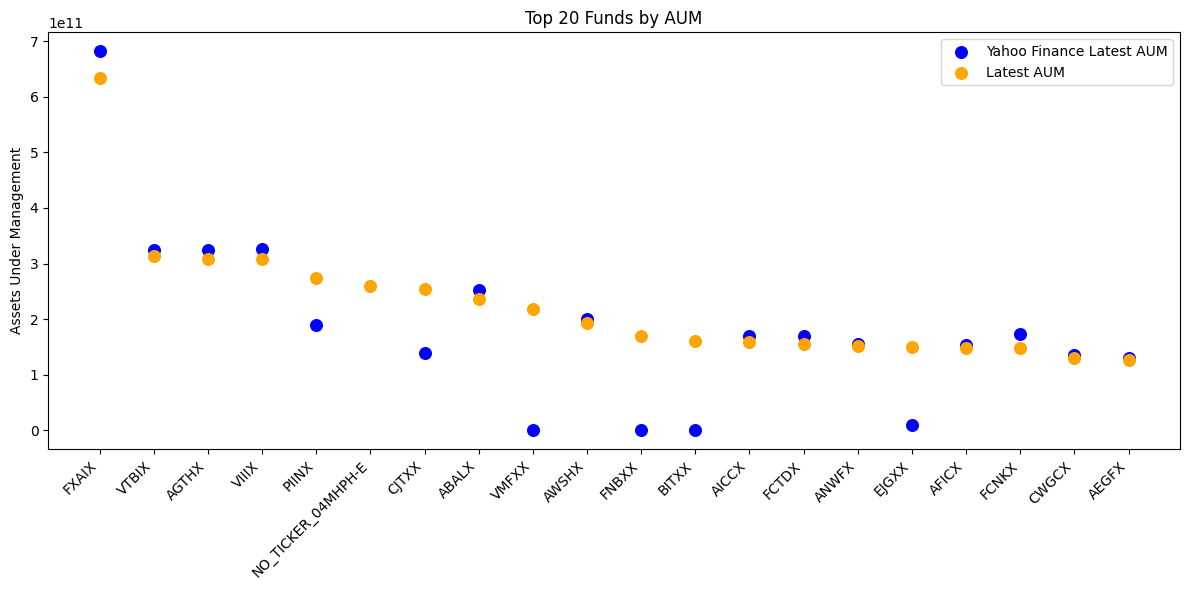

In [ ]:
top_n = 20
df_top = profile_data.sort_values('latest_aum', ascending=False).head(top_n)

x = np.arange(len(df_top))

plt.figure(figsize=(12, 6))
plt.scatter(x, df_top['latest_aum_yf'], color='blue', label='Yahoo Finance Latest AUM', s=70)
plt.scatter(x, df_top['latest_aum'], color='orange', label='Latest AUM', s=70)

plt.xticks(x, df_top['fund_ticker'], rotation=45, ha='right')
plt.ylabel('Assets Under Management')
plt.title(f'Top {top_n} Funds by AUM')
plt.legend()
plt.tight_layout()
plt.show()


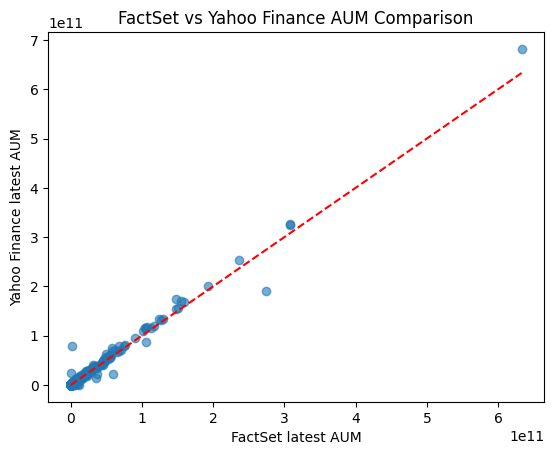

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(funds_df['latest_aum'], funds_df['latest_aum_yf'], alpha=0.6)
plt.xlabel('FactSet latest AUM')
plt.ylabel('Yahoo Finance latest AUM')
plt.title('FactSet vs Yahoo Finance AUM Comparison')
plt.plot([0, funds_df['latest_aum'].max()], [0, funds_df['latest_aum'].max()], color='red', linestyle='--')  #
plt.show()


Group-level comparison

In [ ]:
funds_df.groupby('style')[['latest_aum', 'latest_aum_yf']].mean()

funds_df.groupby('fund_family')['aum_diff_pct'].mean().sort_values(ascending=False)


,aum_diff_pct
fund_family,
DFA Funds,1170.494328
Penn Mutual Funds,423.320706
Azzad Funds,90.949261
Masters Select Funds,89.856665
JOHCM Funds,87.511094
...,...
Teberg Funds,NaN
Toews Funds,NaN
Tortoise Funds,NaN


Outlier detection

In [ ]:
outliers = funds_df[abs(funds_df['aum_diff_pct']) > 20]
outliers[['fund_ticker', 'latest_aum', 'latest_aum_yf', 'aum_diff_pct']]

,fund_ticker,latest_aum,latest_aum_yf,aum_diff_pct
18,ALAFX,2.381773e+09,3.270584e+09,37.317229
48,BHEIX,1.188000e+09,1.854276e+09,56.083876
52,BUFEX,1.317673e+08,1.633152e+08,23.942124
104,ELDFX,1.074603e+08,1.844732e+08,71.666380
111,FADTX,6.605400e+09,7.998637e+09,21.092392
...,...,...,...,...
5606,CWEAX,3.448907e+07,4.865098e+07,41.062047
5608,IEMIX,9.820686e+07,2.714297e+07,-72.361434
5615,JAKRX,2.446407e+08,3.287277e+08,34.371634
5618,OWTEX,6.064744e+08,7.934812e+08,30.835074


Histogram of relative differences


<Axes: xlabel='style', ylabel='aum_diff_pct'>

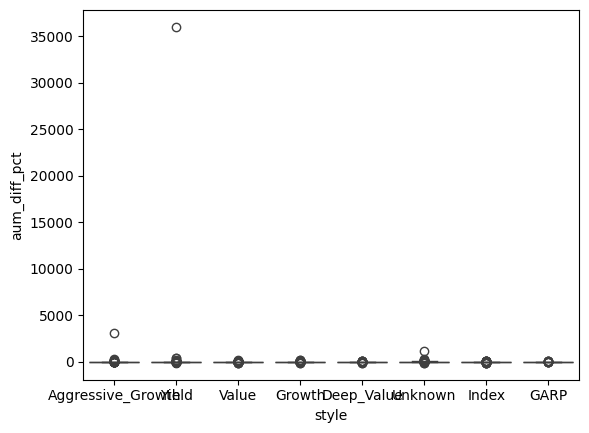

In [ ]:
import seaborn as sns
sns.boxplot(x='style', y='aum_diff_pct', data=funds_df)


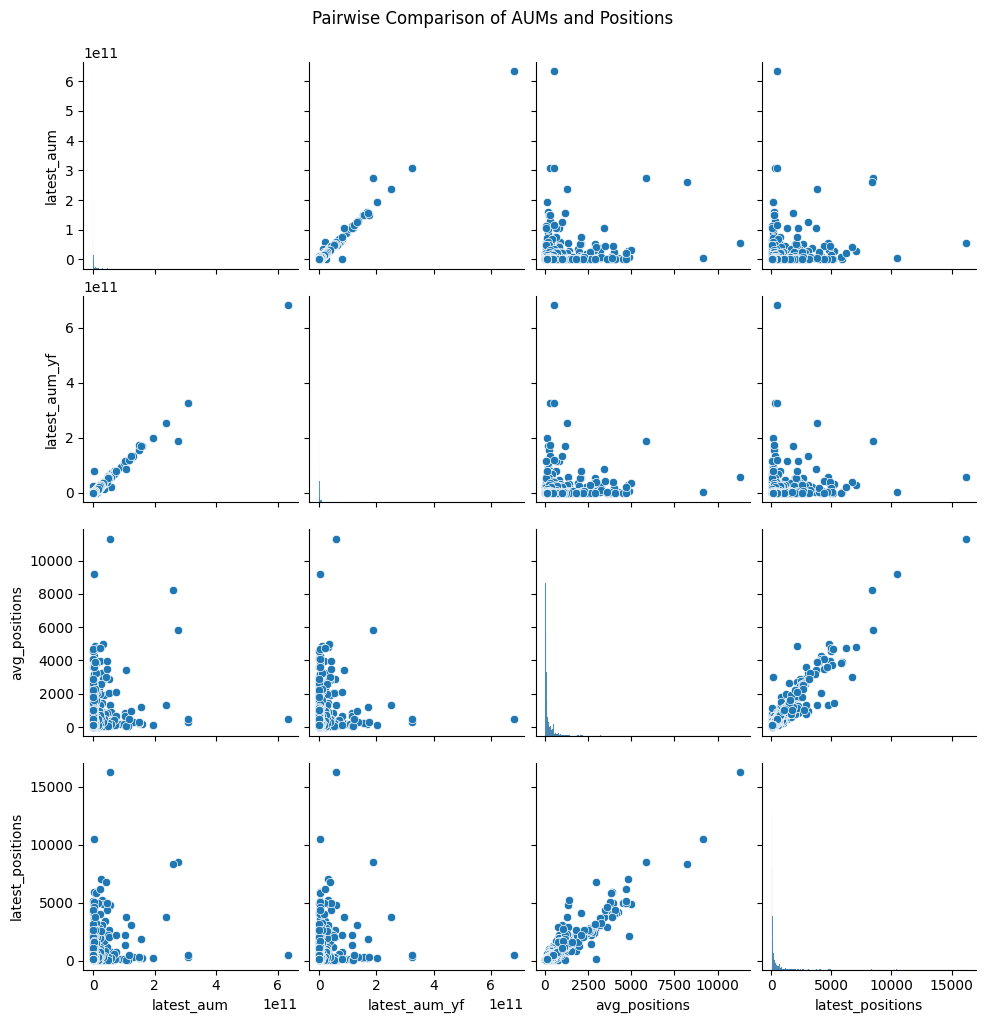

In [ ]:
sns.pairplot(funds_df[['latest_aum', 'latest_aum_yf', 'avg_positions', 'latest_positions']])
plt.suptitle('Pairwise Comparison of AUMs and Positions', y=1.02)
plt.show()


## Return Data

In [84]:
profile_data.columns

Index(['factset_fund_id', 'fund_ticker', 'first_date', 'last_date',
       'total_observations', 'active', 'style', 'fund_family',
       'fund_proper_name', 'share_class_tickers', 'num_share_classes',
       'avg_positions', 'max_positions', 'min_positions', 'avg_aum', 'max_aum',
       'min_aum', 'quarter_end_count', 'month_end_count', 'latest_aum',
       'latest_positions', '2b_filter', 'latest_aum_yf'],
      dtype='object')

In [89]:
profile_data.head()

,factset_fund_id,fund_ticker,first_date,last_date,total_observations,active,style,fund_family,fund_proper_name,share_class_tickers,...,min_positions,avg_aum,max_aum,min_aum,quarter_end_count,month_end_count,latest_aum,latest_positions,2b_filter,latest_aum_yf
0,00DW8X-E,VNGAX,2024-09-30,2025-03-31,3,True,Aggressive_Growth,Unknown,Vontobel Global Equity Fund,VNGAX|VNGIX|VNGYX,...,42,1.860372e+07,2.002351e+07,1.586490e+07,3,3,2.002351e+07,46.0,success,2.201733e+07
1,04B8BC-E,AABPX,2008-01-31,2025-06-30,177,True,Yield,American Beacon Funds,American Beacon Balanced Fund,AABPX|AADBX|ABCCX|ABCTX|ABFAX|ABGHX|ABLSX|ACBYX,...,112,4.161684e+08,1.059701e+09,9.797474e+07,58,176,1.016549e+08,376.0,success,1.051490e+08
2,04B8BD-E,AADEX,2008-01-31,2025-06-30,180,True,Yield,American Beacon Funds,American Beacon Large Cap Value Fund,AADEX|AAGPX|AALRX|ABLYX|ALVAX|ALVCX|ALVTX|AVASX,...,137,6.456851e+09,1.159199e+10,2.778808e+09,59,179,3.171412e+09,166.0,success,3.286823e+09
3,04B8BK-E,TETAX,2008-03-31,2025-03-31,68,True,Value,Tamarack Funds,RBC Enterprise Fund,TETAX|TETIX,...,62,1.010521e+08,2.341894e+08,4.522982e+07,55,55,5.592843e+07,72.0,success,5.742906e+07
4,04B8BQ-E,CIRRX,2008-03-31,2025-03-31,69,True,Yield,Cohen & Steers Funds,Cohen & Steers Real Estate Securities Fund,CIRRX|CREFX|CSBIX.XX1|CSCIX|CSDIX|CSEIX|CSZIX|...,...,32,3.483561e+09,8.797167e+09,2.100991e+08,69,69,7.877797e+09,39.0,success,8.051332e+09


In [109]:
import xarray as xr
import pandas as pd
import gcsfs

fs = gcsfs.GCSFileSystem()

# All fund IDs from profile_data
all_fund_ids = profile_data['factset_fund_id'].tolist()

# Find the first 10 fund IDs that actually exist
available_fund_ids = []
for fund_id in all_fund_ids:
    path = f"gs://rm_api_data/ERM3_Funds/factset_fund_id/{fund_id}/fund.zarr"
    if fs.exists(path):
        available_fund_ids.append(fund_id)
    if len(available_fund_ids) == 10:
        break

print("Available fund IDs:", available_fund_ids)

# Load total_return for each available fund
df_list = []

for fund_id in available_fund_ids:
    path = f"gs://rm_api_data/ERM3_Funds/factset_fund_id/{fund_id}/fund.zarr"
    ds = xr.open_zarr(path)[['total_return']].compute()
    df_fund = ds.to_dataframe().dropna().reset_index()
    df_fund = df_fund.rename(columns={'teo': 'date'})
    df_list.append(df_fund[['factset_fund_id', 'date', 'total_return']])

# Concatenate
df_total_return = pd.concat(df_list, ignore_index=True)
df_total_return.head()


Available fund IDs: ['04B8NR-E', '04B8SY-E', '04B8X2-E', '04B92L-E', '04B946-E', '04B94T-E', '04B95K-E', '04B9JB-E', '04B9KC-E', '04B9LC-E']


,factset_fund_id,date,total_return
0,04B8NR-E,2008-06-30,-0.451327
1,04B8NR-E,2008-09-30,2.844296
2,04B8NR-E,2008-12-31,3.172908
3,04B8NR-E,2009-03-31,1.398470
4,04B8NR-E,2009-06-30,-0.194398


In [111]:
df_total_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   factset_fund_id  722 non-null    object        
 1   date             722 non-null    datetime64[ns]
 2   total_return     722 non-null    float32       
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 14.2+ KB


In [119]:
# Keep only relevant columns from profile_data
profile_subset = profile_data[['factset_fund_id', 'fund_ticker']]

# Merge with df_total_return on factset_fund_id
df_total_return = df_total_return.merge(profile_subset, on='factset_fund_id', how='left')

# Optional: reorder columns
df_total_return = df_total_return[['factset_fund_id', 'fund_ticker', 'date', 'total_return']]

df_total_return.head()


,factset_fund_id,fund_ticker,date,total_return
0,04B8NR-E,BAETX,2008-06-30,-0.451327
1,04B8NR-E,BAETX,2008-09-30,2.844296
2,04B8NR-E,BAETX,2008-12-31,3.172908
3,04B8NR-E,BAETX,2009-03-31,1.398470
4,04B8NR-E,BAETX,2009-06-30,-0.194398


In [121]:
df_total_return = df_total_return[['date', 'factset_fund_id', 'fund_ticker', 'total_return']]

df_total_return


,date,factset_fund_id,fund_ticker,total_return
0,2008-06-30,04B8NR-E,BAETX,-0.451327
1,2008-09-30,04B8NR-E,BAETX,2.844296
2,2008-12-31,04B8NR-E,BAETX,3.172908
3,2009-03-31,04B8NR-E,BAETX,1.398470
4,2009-06-30,04B8NR-E,BAETX,-0.194398
...,...,...,...,...
717,2025-01-31,04B9LC-E,FDVLX,-1.321570
718,2025-02-28,04B9LC-E,FDVLX,0.730374
719,2025-03-31,04B9LC-E,FDVLX,0.135408
720,2025-04-30,04B9LC-E,FDVLX,-0.542853


In [126]:
valid_tickers = []
for ticker in df_total_return['fund_ticker'].unique():
    try:
        data = yf.download(ticker, start=start_date, end=end_date + pd.Timedelta(days=1),
                           interval="1d", progress=False, auto_adjust=True)
        if not data.empty:
            valid_tickers.append(ticker)
    except:
        continue

print("Valid tickers:", valid_tickers)


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAETX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2008-02-29 00:00:00 -> 2025-07-01 00:00:00)')


Valid tickers: ['JCSCX', 'CFIMX', 'DALCX', 'DFSVX', 'DISVX', 'DODGX', 'FACSX', 'FMIMX', 'FDVLX']


In [138]:
import yfinance as yf
import pandas as pd


yf_returns_list = []

start_date = df_total_return['date'].min()
end_date = df_total_return['date'].max()

for ticker in valid_tickers:
    data = yf.download(ticker, start=start_date, end=end_date + pd.Timedelta(days=1),
                       interval="1d", progress=False, auto_adjust=True)
    if data.empty:
        continue
    data = data[['Close']].rename(columns={'Close': 'adj_close'})
    data.index = pd.to_datetime(data.index)

    # Filter df_total_return for this ticker
    df_ticker = df_total_return[df_total_return['fund_ticker'] == ticker].copy()
    df_ticker = df_ticker.sort_values('date')

    # Align prices to the dates
    prices = data.reindex(df_ticker['date']).ffill()

    # Compute returns
    df_ticker['yf_total_return'] = prices['adj_close'].pct_change().values

    yf_returns_list.append(df_ticker)

# Concatenate results
if yf_returns_list:
    df_yf_total_return = pd.concat(yf_returns_list, ignore_index=True)
    df_yf_total_return = df_yf_total_return[['date', 'factset_fund_id', 'fund_ticker', 'total_return', 'yf_total_return']]
    df_yf_total_return.head()
else:
    print("No tickers with Yahoo Finance data were found.")


In [139]:
df_yf_total_return

,date,factset_fund_id,fund_ticker,total_return,yf_total_return
0,2008-02-29,04B8SY-E,JCSCX,-2.743279,NaN
1,2008-03-31,04B8SY-E,JCSCX,0.997306,0.003899
2,2008-04-30,04B8SY-E,JCSCX,-0.453966,0.028725
3,2008-06-30,04B8SY-E,JCSCX,-1.452495,-0.039999
4,2008-07-31,04B8SY-E,JCSCX,-1.067708,0.022799
...,...,...,...,...,...
668,2025-01-31,04B9LC-E,FDVLX,-1.321570,0.030147
669,2025-02-28,04B9LC-E,FDVLX,0.730374,-0.040685
670,2025-03-31,04B9LC-E,FDVLX,0.135408,-0.042411
671,2025-04-30,04B9LC-E,FDVLX,-0.542853,-0.039627


In [151]:
import yfinance as yf
import pandas as pd

yf_returns_list = []

start_date = df_total_return['date'].min()
end_date = df_total_return['date'].max()

for ticker in valid_tickers:
    data = yf.download(
        ticker,
        start=start_date,
        end=end_date + pd.Timedelta(days=1),
        interval="1d",
        progress=False,
        auto_adjust=True
    )
    if data.empty:
        continue

    data = data[['Close']].rename(columns={'Close': 'adj_close'})
    data.index = pd.to_datetime(data.index)

    monthly_prices = data['adj_close'].resample('ME').last()

    monthly_ret = monthly_prices.pct_change().dropna()

    df_monthly = monthly_ret.reset_index()
    df_monthly.columns = ['date', 'monthly_return']

    df_monthly['ticker'] = ticker

    yf_returns_list.append(df_monthly)

df_yf_monthly = pd.concat(yf_returns_list, ignore_index=True)

df_yf_monthly = df_yf_monthly.sort_values(['date', 'ticker']).reset_index(drop=True)

df_yf_monthly.head()


,date,monthly_return,ticker
0,2008-03-31,-0.028760,CFIMX
1,2008-03-31,-0.023832,DALCX
2,2008-03-31,0.008380,DFSVX
3,2008-03-31,0.009226,DISVX
4,2008-03-31,-0.032159,DODGX


merge monthly data

In [153]:
df_yf_monthly_renamed = df_yf_monthly.rename(columns={'ticker': 'fund_ticker', 'monthly_return': 'yf_monthly_return'})

df_merged = pd.merge(
    df_total_return,
    df_yf_monthly_renamed,
    on=['date', 'fund_ticker'],
    how='left'
)

df_merged = df_merged[['date', 'factset_fund_id', 'fund_ticker', 'total_return', 'yf_monthly_return']]

df_merged.tail()


,date,factset_fund_id,fund_ticker,total_return,yf_monthly_return
717,2025-01-31,04B9LC-E,FDVLX,-1.321570,0.030147
718,2025-02-28,04B9LC-E,FDVLX,0.730374,-0.040685
719,2025-03-31,04B9LC-E,FDVLX,0.135408,-0.042411
720,2025-04-30,04B9LC-E,FDVLX,-0.542853,-0.039627
721,2025-06-30,04B9LC-E,FDVLX,0.196631,0.050077


statistical analysis

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

df_compare = df_merged.dropna(subset=['total_return', 'yf_monthly_return']).copy()


In [156]:
import pandas as pd

df_comp = df_merged.copy()

df_comp = df_comp.dropna(subset=['yf_monthly_return'])
df_comp.head()

,date,factset_fund_id,fund_ticker,total_return,yf_monthly_return
50,2008-03-31,04B8SY-E,JCSCX,0.997306,0.003899
51,2008-04-30,04B8SY-E,JCSCX,-0.453966,0.028725
52,2008-06-30,04B8SY-E,JCSCX,-1.452495,-0.088824
53,2008-07-31,04B8SY-E,JCSCX,-1.067708,0.022799
54,2008-09-30,04B8SY-E,JCSCX,3.820580,-0.083150


count, mean, std, min, max, and quartiles for each fund

In [157]:
stats_per_fund = df_comp.groupby('fund_ticker')[['total_return', 'yf_monthly_return']].describe()
stats_per_fund


total_return                                                    \
                   count      mean       std       min       25%       50%   
fund_ticker                                                                  
CFIMX               45.0  0.165864  1.791258 -2.519369 -0.690091 -0.045801   
DALCX              123.0  0.027550  1.177462 -3.077289 -0.673076 -0.044905   
DFSVX               50.0 -0.371420  1.294940 -3.444032 -1.063045 -0.150773   
DISVX               55.0  0.025449  1.299331 -3.656842 -0.596570  0.057535   
DODGX               50.0  0.229239  1.796918 -3.067264 -0.588032  0.101948   
FACSX              106.0  0.000285  1.029024 -2.693444 -0.604676  0.078857   
FDVLX              143.0 -0.000460  1.216700 -3.022063 -0.677343  0.035310   
FMIMX               45.0  0.233483  1.115559 -2.343189 -0.526970  0.286566   
JCSCX               55.0  0.216231  1.261496 -3.047165 -0.429611  0.140018   

                                 yf_monthly_return                      \
                  75%        max             count      mean       std   
fund_ticker                                                              
CFIMX        0.638530   9.246011              45.0 -0.015207  0.061507   
DALCX        0.664642   7.494947             123.0  0.005839  0.047905   
DFSVX        0.551932   2.536638              50.0  0.022653  0.066173   
DISVX        0.579709   2.995020              55.0  0.024551  0.046222   
DODGX        0.809124  10.416416              50.0 -0.003969  0.060669   
FACSX        0.513620   4.558362             106.0  0.011725  0.053001   
FDVLX        0.604728   4.995656             143.0  0.010143  0.067240   
FMIMX        0.874007   3.024199              45.0  0.001181  0.058606   
JCSCX        0.659016   3.820580              55.0 -0.000595  0.069088   

                                                               
                  min       25%       50%       75%       max  
fund_ticker                                                    
CFIMX       -0.190736 -0.040410 -0.011301  0.023605  0.125753  
DALCX       -0.214325 -0.018921  0.012948  0.032837  0.121125  
DFSVX       -0.094100 -0.018438  0.011396  0.062771  0.196560  
DISVX       -0.099251 -0.011947  0.028423  0.050824  0.164764  
DODGX       -0.195499 -0.030671  0.003135  0.033883  0.099873  
FACSX       -0.189807 -0.017373  0.016139  0.037007  0.137971  
FDVLX       -0.270242 -0.025000  0.013422  0.047472  0.225608  
FMIMX       -0.179245 -0.039261  0.008573  0.037614  0.098996  
JCSCX       -0.212318 -0.044463  0.007925  0.045426  0.172413

Compute correlation between ERM3 and Yahoo returns per fund
High correlation (~1) → ERM3 and Yahoo returns are very similar.

Low correlation → discrepancies exist.

In [158]:
correlations = df_comp.groupby('fund_ticker').apply(
    lambda x: x['total_return'].corr(x['yf_monthly_return'])
).reset_index(name='correlation')
correlations


/tmp/ipython-input-3577071419.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_comp.groupby('fund_ticker').apply(


,fund_ticker,correlation
0,CFIMX,0.124031
1,DALCX,0.094709
2,DFSVX,-0.024893
3,DISVX,0.217030
4,DODGX,-0.097077
5,FACSX,-0.100926
6,FDVLX,-0.051479
7,FMIMX,0.174878
8,JCSCX,-0.118165


Each color represents a different fund.

Diagonal trend shows agreement; deviations indicate differences.

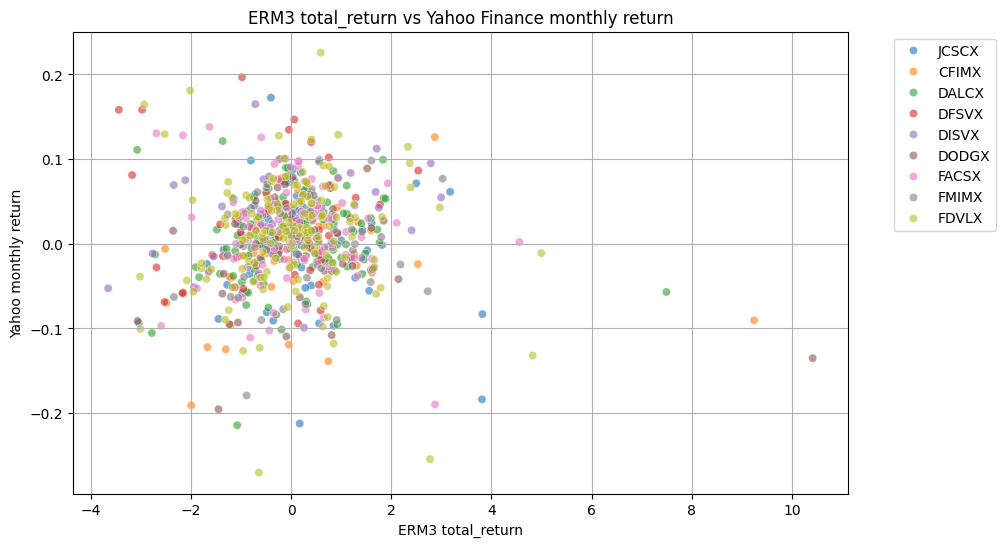

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_comp, x='total_return', y='yf_monthly_return', hue='fund_ticker', alpha=0.6)
plt.title('ERM3 total_return vs Yahoo Finance monthly return')
plt.xlabel('ERM3 total_return')
plt.ylabel('Yahoo monthly return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


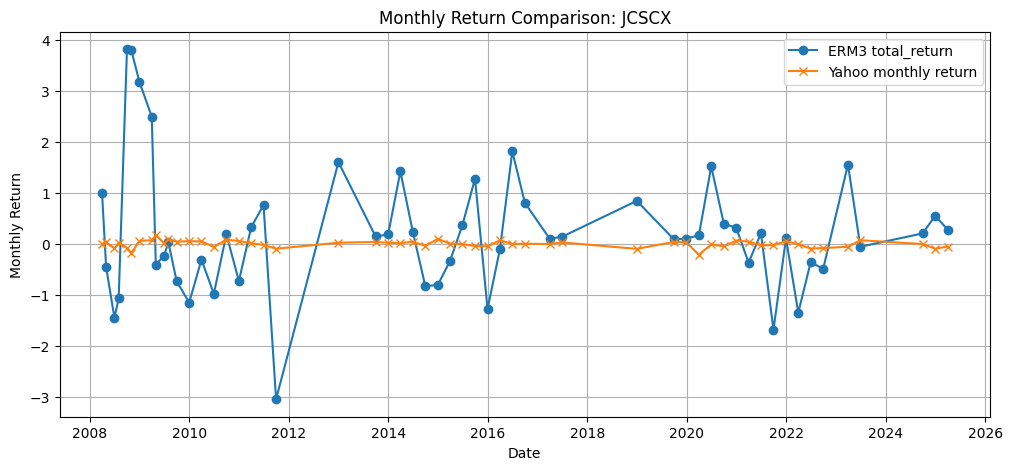

In [160]:
fund_example = 'JCSCX'
df_example = df_comp[df_comp['fund_ticker'] == fund_example]

plt.figure(figsize=(12, 5))
plt.plot(df_example['date'], df_example['total_return'], label='ERM3 total_return', marker='o')
plt.plot(df_example['date'], df_example['yf_monthly_return'], label='Yahoo monthly return', marker='x')
plt.title(f'Monthly Return Comparison: {fund_example}')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


In [161]:
overall_stats = df_comp[['total_return', 'yf_monthly_return']].describe()
overall_stats

overall_corr = df_comp['total_return'].corr(df_comp['yf_monthly_return'])
print("Overall correlation between ERM3 and Yahoo returns:", overall_corr)


Overall correlation between ERM3 and Yahoo returns: -0.012079406997851247


## Quarterly return

In [82]:
import yfinance as yf
import pandas as pd
from datetime import datetime

end_date_window = datetime(2025, 6, 30)
start_date_window = datetime(2024, 9, 30)

tickers = profile_data['fund_ticker'].tolist()
max_tickers = 5
tickers = tickers[:max_tickers]

all_data = []

for ticker in tickers:
    try:
        data = yf.download(
            ticker,
            start=start_date_window.strftime('%Y-%m-%d'),
            end=end_date_window.strftime('%Y-%m-%d'),
            progress=False,
            auto_adjust=True
        )

        if data.empty or 'Adj Close' not in data.columns:
            print(f"No Yahoo data for {ticker}, skipping.")
            continue

        df = data[['Adj Close']].rename(columns={'Adj Close': 'nav'})
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()

        quarterly_nav = df.resample('QE').last()

        quarterly_nav['quarterly_return'] = quarterly_nav['nav'].pct_change() * 100

        quarterly_nav['fund_ticker'] = ticker

        all_data.append(quarterly_nav.reset_index())

    except Exception as e:
        print(f"Error fetching ticker {ticker}: {e}")

if all_data:
    yahoo_quarterly_df = pd.concat(all_data, ignore_index=True)
    print(yahoo_quarterly_df)
else:
    print("No Yahoo data fetched for the selected tickers.")


No Yahoo data for VNGAX, skipping.
No Yahoo data for AABPX, skipping.
No Yahoo data for AADEX, skipping.
No Yahoo data for TETAX, skipping.
No Yahoo data for CIRRX, skipping.
No Yahoo data fetched for the selected tickers.


In [ ]:
import pandas as pd
import xarray as xr
import yfinance as yf
from datetime import datetime

# Define 1-year window
start_date_window = datetime(2024, 9, 30)
end_date_window = datetime(2025, 6, 30)

# Limit to first 5 tickers
fund_ids = profile_data['factset_fund_id'][:5]

all_data = []

for fund_id in fund_ids:
    ticker = profile_data.loc[profile_data['factset_fund_id']==fund_id, 'fund_ticker'].values[0]

    # --- ZARR DATA ---
    path = f"gs://rm_api_data/ERM3_Funds/factset_fund_id/{fund_id}/fund.zarr"
    try:
        ds = xr.open_zarr(path)[['total_return']].compute()
        df_zarr = ds.to_dataframe().dropna().reset_index()
        df_zarr['date'] = pd.to_datetime(df_zarr['teo'])
        df_zarr = df_zarr[(df_zarr['date'] >= start_date_window) & (df_zarr['date'] <= end_date_window)]
        df_zarr = df_zarr[['date','total_return']]
    except FileNotFoundError:
        print(f"Zarr file not found for fund {fund_id}, skipping Zarr data.")
        df_zarr = pd.DataFrame(columns=['date','total_return'])

    # --- YAHOO FINANCE DATA ---
    try:
        data_yf = yf.download(
            ticker,
            start=start_date_window.strftime('%Y-%m-%d'),
            end=end_date_window.strftime('%Y-%m-%d'),
            progress=False,
            auto_adjust=True
        )
        if data_yf.empty or 'Adj Close' not in data_yf.columns:
            print(f"No Yahoo data for {ticker}, skipping Yahoo returns.")
            continue

        df_yf = data_yf[['Adj Close']].rename(columns={'Adj Close':'nav'})
        df_yf.index = pd.to_datetime(df_yf.index)
        df_yf = df_yf.sort_index()

        # Quarterly NAV resample
        quarterly_nav = df_yf.resample('QE').last()
        quarterly_nav['quarterly_return'] = quarterly_nav['nav'].pct_change() * 100

        # Merge with Zarr total return
        quarterly_nav = quarterly_nav.reset_index()
        merged = pd.merge(quarterly_nav, df_zarr, on='date', how='left')

        # Add fund info
        merged['factset_fund_id'] = fund_id
        merged['fund_ticker'] = ticker

        # Select columns
        merged = merged[['date','factset_fund_id','fund_ticker','quarterly_return','total_return']]
        all_data.append(merged)

    except Exception as e:
        print(f"Error fetching Yahoo data for {ticker}: {e}")

if all_data:
    returns_df = pd.concat(all_data, ignore_index=True)
    returns_df = returns_df.sort_values(['factset_fund_id','date'])
    print(returns_df)
else:
    print("No data collected.")


In [162]:
returns_df

,date,factset_fund_id,fund_ticker,quarterly_return,total_return
0,2008-03-31,04B8SY-E,JCSCX,1.946728,0.997306
1,2008-06-30,04B8SY-E,JCSCX,-11.120325,-1.452495
2,2008-09-30,04B8SY-E,JCSCX,0.741160,3.820580
3,2008-12-31,04B8SY-E,JCSCX,-15.013474,3.174872
4,2009-03-31,04B8SY-E,JCSCX,-19.240444,2.496831
...,...,...,...,...,...
677,2024-06-30,04B9WJ-E,FSCAX,-11.838531,1.055382
678,2024-09-30,04B9WJ-E,FSCAX,4.392433,0.473944
679,2024-12-31,04B9WJ-E,FSCAX,-31.421560,0.244913
680,2025-03-31,04B9WJ-E,FSCAX,-8.810663,0.106168


statistical analysis of quarterly return

In [ ]:
fund_stats = returns_df.groupby('factset_fund_id')[['factor_return','residual_return','total_return']].agg(
    ['mean','std','min','max']
)
fund_stats


factor_return                               residual_return  \
                         mean       std       min       max            mean   
factset_fund_id                                                               
04B8X2-E             0.149525  1.602652 -2.440909  8.183986        0.016338   
04B92L-E             0.019383  1.085174 -2.900833  6.752480        0.008167   
04B9KC-E             0.204317  1.244705 -2.806370  5.583444        0.029166   

                                              total_return            \
                      std       min       max         mean       std   
factset_fund_id                                                        
04B8X2-E         0.299000 -0.594359  1.062025     0.165864  1.791258   
04B92L-E         0.268478 -1.171353  0.742467     0.027550  1.177462   
04B9KC-E         0.600415 -2.856230  1.109971     0.233483  1.115559   

                                     
                      min       max  
factset_fund_id                      
04B8X2-E        -2.519369  9.246011  
04B92L-E        -3.077289  7.494947  
04B9KC-E        -2.343189  3.024199

In [ ]:
fund_corrs = returns_df.groupby('factset_fund_id')[['factor_return','residual_return','total_return']].corr().unstack()
fund_corrs


factor_return                              residual_return  \
                factor_return residual_return total_return   factor_return   
factset_fund_id                                                              
04B8X2-E                  1.0        0.574622     0.990625        0.574622   
04B92L-E                  1.0        0.234658     0.975127        0.234658   
04B9KC-E                  1.0       -0.445123     0.876194       -0.445123   

                                              total_return                  \
                residual_return total_return factor_return residual_return   
factset_fund_id                                                              
04B8X2-E                    1.0     0.681040      0.990625        0.681040   
04B92L-E                    1.0     0.444280      0.975127        0.444280   
04B9KC-E                    1.0     0.041565      0.876194        0.041565   

                              
                total_return  
factset_fund_id               
04B8X2-E                 1.0  
04B92L-E                 1.0  
04B9KC-E                 1.0

In [ ]:
returns_df['sharpe'] = returns_df['total_return'].mean() / returns_df['total_return'].std()


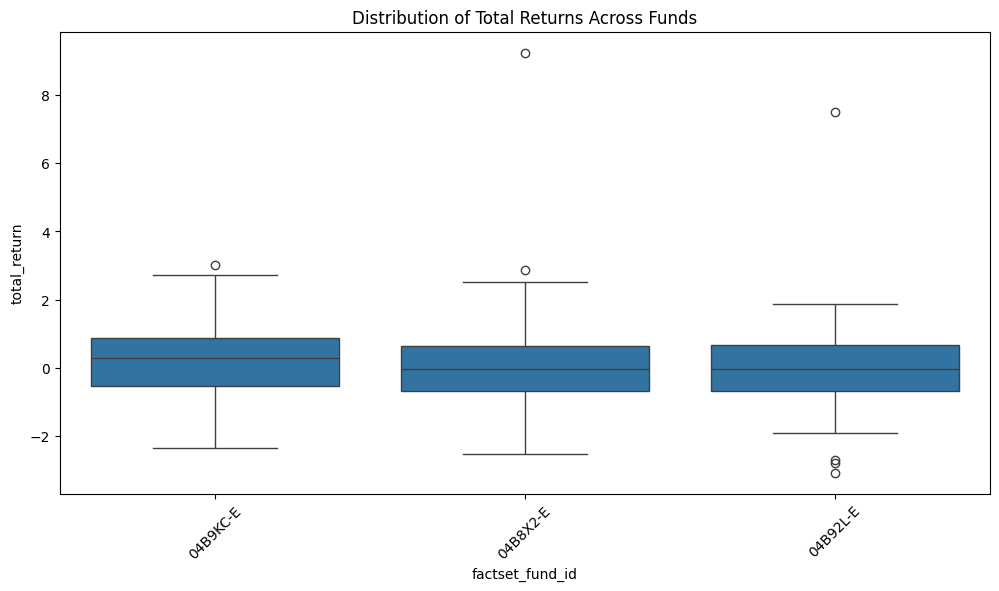

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='factset_fund_id', y='total_return', data=returns_df)
plt.xticks(rotation=45)
plt.title('Distribution of Total Returns Across Funds')
plt.show()
